<img src="images/logoUB.svg"  style="max-width:20%">

# Final project Machine Learning 2019-2020
#### Master in Innovation and Entrepreneurship in Biomedical Engineering
###### Authors: Arantxa Palma Rotaeche, Mónica Tuta

<center>
<h4>
    Heart disease binary classification from clinical data - Modeling
    </h4> 
<img src="images/heartDesease.jpg"  style="max-width:30%">
</center>

<h5>General workflow</h5>
This notebook covers the steps in the following diagram after PCA for Attempt1 and Attempt2, and after splitting data for Attempt3 <br>
The previous steps are found in the notebook <b>01_PreProcessing.ipynb</b><br>
    <center>
<img src="images/newFlowDiagram.png"  style="max-width:70%">
    </center>

## Contents
1. [Upload data](#ud)
1. [Data description](#dd)
1. [Data exploration and preprocessing](#de)
    1. Linear Discriminant Analysis (LDA)
1. [Modeling](#mo)
    1. KNN
    1. Naïve Bayes
    1. Logistic regression
    1. Decission trees
    1. Random Forest
    1. SVM
1. Conclusions (Summary)

#### Packages

In [1]:
#Load libraries
#Library to create the Excel file
library(xlsx)
library(ggpubr)
suppressMessages(library(tidyverse))
library(purrr)
library(tidyr)
#Libraries for plots
library(ggplot2)
library(repr)
library(dplyr)
library(gridExtra)
#Library for models
library("caret")
#Library for LDA
library("MASS")
#Library for KNN
library(class)
#Libraries for Decision trees
library(rpart)
library(rpart.plot)
#Library for SVM and Naive Bayes
library(e1071)
#Library for ROC and AUC
library("pROC")

Loading required package: ggplot2



Attaching package: ‘gridExtra’



The following object is masked from ‘package:dplyr’:

    combine



Loading required package: lattice



Attaching package: ‘caret’



The following object is masked from ‘package:purrr’:

    lift




Attaching package: ‘MASS’



The following object is masked from ‘package:dplyr’:

    select



Type 'citation("pROC")' for a citation.



Attaching package: ‘pROC’



The following objects are masked from ‘package:stats’:

    cov, smooth, var



### Upload Data <a class="anchor" id="ud"></a>

The dataset can be found at: <br>
https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
#Upload dataframes from the notebook 01_PreProcessing
############ Attempt1 ############
#Train
heartPCAtarget<-read.xlsx("heart_preprocessed.xlsx", sheetName = "train_A1")[-1]

#Test
heartPCAtargetTest<-read.xlsx("heart_preprocessed.xlsx", sheetName = "test_A1")[-1]

############ Attempt2 ############
#Train
heartOriginalPCAtarget<-read.xlsx("heart_preprocessed.xlsx", sheetName = "train_A2")[-1]

#Test
heartOriginalPCAtargetTest<-read.xlsx("heart_preprocessed.xlsx", sheetName = "test_A2")[-1]

############ Attempt3 ############
#Train
heartOriginal_train<-read.xlsx("heart_preprocessed.xlsx", sheetName = "train_A3")[-1]

#Test
heartOriginal_test<-read.xlsx("heart_preprocessed.xlsx", sheetName = "test_A3")[-1]

### Data description <a class="anchor" id="dd"></a>

#### Contents

- age - age in years
- **sex** - (1 = male; 0 = female)
- **cp** - chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **restecg** - resting electrocardiographic results (0= normal, 1= having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV), 2= showing probable or definite left ventricular hypertrophy)
- thalach - maximum heart rate achieved
- **exang** - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- **slope** - the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
- ca - number of major vessels (0-3) colored by flourosopy
- **thal** - (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target** - have disease or not (1=yes, 0=no)


**Bold** features are categorical

***Creators***:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
1. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

#### Linear Discriminant Analysis (LDA)

##### ATTEMPT1 USE THE OUTPUT FROM PCA WITH THE FIRST FOUR COMPONENTS (PREPROCESSED DATA)

In [3]:
linear <- lda(target~.,data=heartPCAtarget)
linear
p <- predict(linear,heartPCAtarget)

Call:
lda(target ~ ., data = heartPCAtarget)

Prior probabilities of groups:
        0         1 
0.4490741 0.5509259 

Group means:
         PC1         PC2        PC3         PC4
0 -0.6897215 -0.06723799 -0.0765359 -0.04313055
1  0.5622100  0.05480743  0.0623864  0.03515684

Coefficients of linear discriminants:
          LD1
PC1 1.5522706
PC2 0.3391129
PC3 0.4625581
PC4 0.3728286

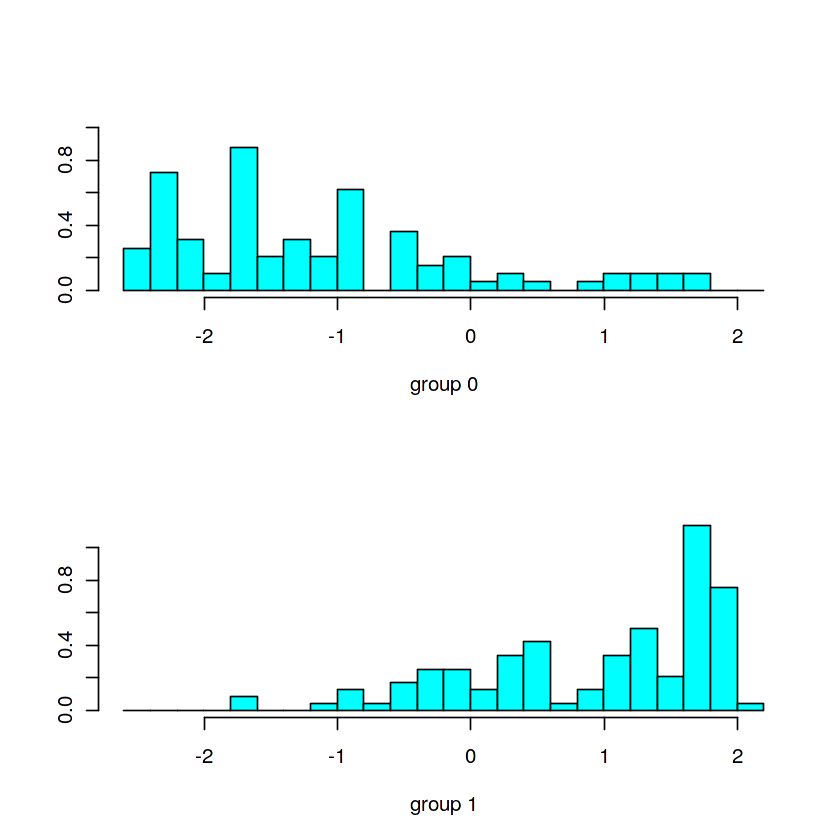

In [4]:
par(mfrow=c(1,2))
ldahist(data = p$x[, 1], g= heartPCAtarget$target)
options(repr_option_defaults)

In [5]:
#Confusion Matrix testing testing data
p1<- predict(linear, heartPCAtarget)$class
tab <- table(Predicted=p1, Actual=heartPCAtarget$target)
tab
(AccuracyTrainLDA1 <- sum(diag(tab))/sum(tab))


#Prediction
p2<- predict(linear,heartPCAtargetTest)$class
(tab2 <- table(Predicted=p2, Actual=heartPCAtargetTest$target))
(AccuracyTestLDA1 <- sum(diag(tab2))/sum(tab2))

         Actual
Predicted   0   1
        0  80  17
        1  17 102

[1] 0.8425926

         Actual
Predicted  0  1
        0 28  9
        1 12 36

[1] 0.7529412

##### ATTEMPT2 USE THE OUTPUT FROM PCA WITH THE FIRST TWO COMPONENTS (ORIGINAL DATA)

In [6]:
linear <- lda(target~.,heartOriginalPCAtarget)
linear
p <- predict(linear,heartOriginalPCAtarget)

Call:
lda(target ~ ., data = heartOriginalPCAtarget)

Prior probabilities of groups:
        0         1 
0.4428571 0.5571429 

Group means:
        PC1      PC2
0 -6.766638 10.98980
1  5.378609 -8.73548

Coefficients of linear discriminants:
             LD1
PC1  0.006060127
PC2 -0.047033407

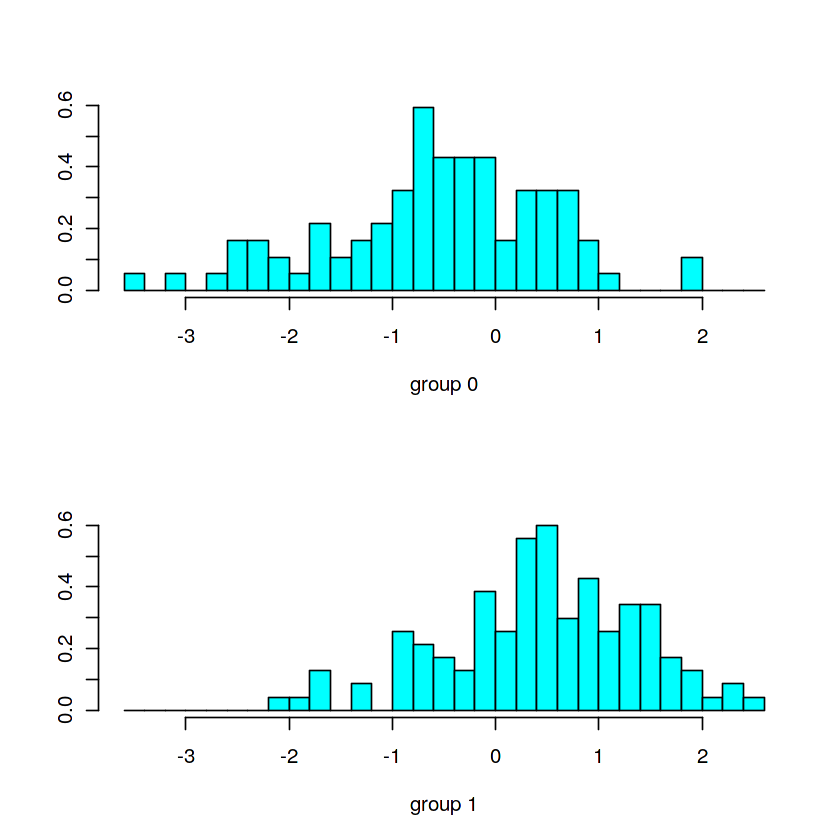

In [7]:
ldahist(data = p$x[, 1], g= heartOriginalPCAtarget$target)

In [8]:
#Confusion Matrix testing training data
p1<- predict(linear, heartOriginalPCAtarget)$class
tab <- table(Predicted=p1, Actual=heartOriginalPCAtarget$target)
tab
(AccuracyTrainLDA2 <- sum(diag(tab))/sum(tab))

#Prediction
p2<- predict(linear,heartOriginalPCAtargetTest)$class
(tab2 <- table(Predicted=p2, Actual=heartOriginalPCAtargetTest$target))
(AccuracyTestLDA2 <- sum(diag(tab2))/sum(tab2))

         Actual
Predicted  0  1
        0 57 24
        1 36 93

[1] 0.7142857

         Actual
Predicted  0  1
        0 24  9
        1 20 38

[1] 0.6813187

##### ATTEMPT3 USE THE ORIGINAL DATA

In [9]:
linear <- lda(target~.,heartOriginal_train)
linear
p <- predict(linear,heartOriginal_train)

Call:
lda(target ~ ., data = heartOriginal_train)

Prior probabilities of groups:
        0         1 
0.4428571 0.5571429 

Group means:
       age       sex        cp trestbps     chol       fbs   restecg  thalach
0 57.44086 0.7849462 0.4193548 135.1398 252.0860 0.1612903 0.4408602 138.8602
1 52.35043 0.5726496 1.3162393 128.1368 240.2735 0.1196581 0.5982906 156.9316
      exang   oldpeak    slope        ca     thal
0 0.5806452 1.7021505 1.172043 1.2150538 2.602151
1 0.1709402 0.5769231 1.581197 0.2905983 2.153846

Coefficients of linear discriminants:
                  LD1
age      -0.014181691
sex      -0.581208002
cp        0.424104985
trestbps -0.007906961
chol     -0.002697311
fbs      -0.109914961
restecg   0.289206876
thalach   0.008453359
exang    -0.640054052
oldpeak  -0.267266320
slope     0.184479977
ca       -0.394976685
thal     -0.548718154

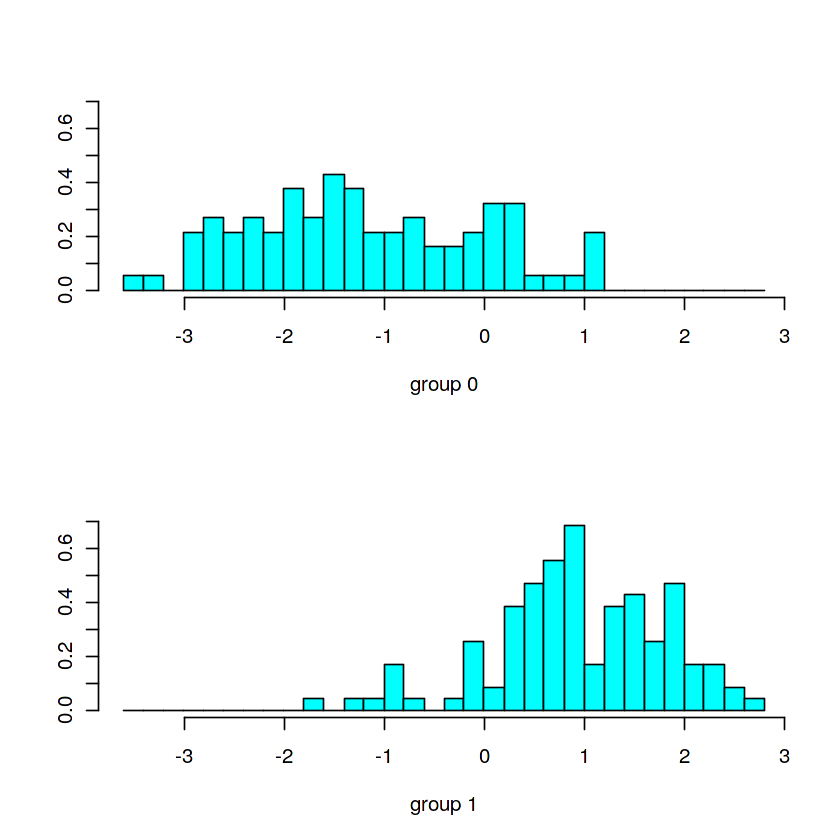

In [10]:
ldahist(data = p$x[, 1], g= heartOriginal_train$target)

In [11]:
#Confusion Matrix testing data
p1<- predict(linear, heartOriginal_train)$class
tab <- table(Predicted=p1, Actual=heartOriginal_train$target)
tab
(AccuracyTrainLDA3 <- sum(diag(tab))/sum(tab))

#Confusion Matrix testing training data
p2<- predict(linear,heartOriginal_test)$class
tab2 <- table(Predicted=p2, Actual=heartOriginal_test$target)
tab2
(AccuracyTestLDA3 <- sum(diag(tab2))/sum(tab2))

         Actual
Predicted   0   1
        0  70   9
        1  23 108

[1] 0.847619

         Actual
Predicted  0  1
        0 30  0
        1 14 47

[1] 0.8461538

29 miss classifications in the model with training data and 15 with testing data, Accuracy of the model: 86.57% with training data and 80% with testing data

Conclusion: LDA do not help us to have a clear separation between the two groups as it can be seen in the past histogram, both variables were not maximally separated. LDA only makes sense in a multiclass setting.

##### COMPARISON BETWEEN THE THREE ATTEMPTS FOR LDA

In [12]:
Result_Attempt1<-c(AccuracyTrainLDA1,AccuracyTestLDA1)
Result_Attempt2<-c(AccuracyTrainLDA2,AccuracyTestLDA2)
Result_Attempt3<-c(AccuracyTrainLDA3,AccuracyTestLDA3)

comparison<-data.frame(Result_Attempt1,Result_Attempt2,Result_Attempt3)
row.names(comparison)<-c("Test","Train")
comparison

,Result_Attempt1,Result_Attempt2,Result_Attempt3
,<dbl>,<dbl>,<dbl>
Test,0.8425926,0.7142857,0.8476190
Train,0.7529412,0.6813187,0.8461538


**Conclusion:** Attempt3 has the highest accurate follow by Attempt1 and lastly Attempt2

### Modeling <a class="anchor" id="mo"></a>

In [13]:
#Convert target to factor in all Atempts
############ Attempt1 ############
heartPCAtarget$target <- as.factor(heartPCAtarget$target)
heartPCAtargetTest$target <- as.factor(heartPCAtargetTest$target)
############ Attempt2 ############
heartOriginalPCAtarget$target<- as.factor(heartOriginalPCAtarget$target)
heartOriginalPCAtargetTest$target <- as.factor(heartOriginalPCAtargetTest$target)
############ Attempt 3 ############
heartOriginal_train$target <- as.factor(heartOriginal_train$target)
heartOriginal_test$target <- as.factor(heartOriginal_test$target)

#### k-Nearest Neighbors (KNN)

In [14]:
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(3333)
############ Attempt1 ############
#Model
knn_heart_pred1 <- train(target ~., data = heartPCAtarget, method = "knn",
                         trControl=trctrl,
                         tuneLength = 10)

#Train
knn_predTrain1 <- predict(knn_heart_pred1,newdata = heartPCAtarget)
knn_cfTrain1 <- confusionMatrix(knn_predTrain1, heartPCAtarget$target,positive ="1" )

#Test
knn_predTest1 <- predict(knn_heart_pred1,newdata = heartPCAtargetTest)
knn_cfTest1 <- confusionMatrix(knn_predTest1, heartPCAtargetTest$target,positive ="1" )

# Compute the accuracy
knn_acc1Train <- mean(knn_predTrain1 == heartPCAtarget$target) #Attempt1 Train
knn_acc1Test <- mean(knn_predTest1 == heartPCAtargetTest$target) #Attempt1 Test

In [15]:
############ Attempt2 ############
#Model
knn_heart_pred2 <- train(target ~., data = heartOriginalPCAtarget, method = "knn",
                         trControl=trctrl,
                         tuneLength = 10)

#Train
knn_predTrain2 <- predict(knn_heart_pred2,newdata = heartOriginalPCAtarget)
knn_cfTrain2 <- confusionMatrix(knn_predTrain2, heartOriginalPCAtarget$target,positive ="1" )

#Test
knn_predTest2 <- predict(knn_heart_pred2,newdata = heartOriginalPCAtargetTest)
knn_cfTest2 <- confusionMatrix(knn_predTest2, heartOriginalPCAtargetTest$target,positive ="1" )

# Compute the accuracy
knn_acc2Train <- mean(knn_predTrain2 == heartOriginalPCAtarget$target) #Attempt2 Train
knn_acc2Test <- mean(knn_predTest2 == heartOriginalPCAtargetTest$target) #Attempt2 Test

In [16]:
############ Attempt3 ############
#Model
knn_heart_pred3 <- train(target ~., data = heartOriginal_train, method = "knn",
                         trControl=trctrl,
                         tuneLength = 10)

#Train
knn_predTrain3 <- predict(knn_heart_pred3,newdata = heartOriginal_train)
knn_cfTrain3 <- confusionMatrix(knn_predTrain3, heartOriginal_train$target,positive ="1" )

#Test
knn_predTest3 <- predict(knn_heart_pred3,newdata = heartOriginal_test)
knn_cfTest3 <- confusionMatrix(knn_predTest3, heartOriginal_test$target,positive ="1" )

# Compute the accuracy
knn_acc3Train <- mean(knn_predTrain3 == heartOriginal_train$target) #Attempt3 Train
knn_acc3Test <- mean(knn_predTest3 == heartOriginal_test$target) #Attempt3 Test

In [17]:
print ("-----------NAIVE BAYES ACCURACIES-----------",quote=FALSE)
print(paste("Accuracy train Attempt1: ",knn_acc1Train),quote=FALSE)
print(paste("Accuracy test Attempt1: ",knn_acc1Test),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt2: ",knn_acc2Train),quote=FALSE)
print(paste("Accuracy test Attempt2: ",knn_acc2Test),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt3: ",knn_acc3Train),quote=FALSE)
print(paste("Accuracy test Attempt3: ",knn_acc3Test),quote=FALSE)

[1] -----------NAIVE BAYES ACCURACIES-----------


[1] Accuracy train Attempt1:  0.856481481481482


[1] Accuracy test Attempt1:  0.8


[1] --------------------------------------------


[1] Accuracy train Attempt2:  0.70952380952381


[1] Accuracy test Attempt2:  0.681318681318681


[1] --------------------------------------------


[1] Accuracy train Attempt3:  0.728571428571429


[1] Accuracy test Attempt3:  0.659340659340659


In [18]:
### ROC CURVES FOR KNN ###
############ Attempt1 ############
knn_ROCTrain1 <- roc(heartPCAtarget$target, as.numeric(knn_predTrain1))
knn_ROCTest1 <- roc(heartPCAtargetTest$target, as.numeric(knn_predTest1))
############ Attempt2 ############
knn_ROCTrain2 <- roc(heartOriginalPCAtarget$target,as.numeric(knn_predTrain2))
knn_ROCTest2 <- roc(heartOriginalPCAtargetTest$target,as.numeric(knn_predTest2))
############ Attempt3 ############
knn_ROCTrain3 <- roc(heartOriginal_train$target, as.numeric(knn_predTrain3))
knn_ROCTest3 <- roc(heartOriginal_test$target, as.numeric(knn_predTest3))

Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


In [19]:
## Performance metrics ##
############ Attempt1 ############
#Train
knn_accTrain1 <- round(knn_acc1Test, digits = 3)
knn_senTrain1 <- round(sensitivity(knn_predTrain1,heartPCAtarget$target), digits = 3)
knn_speTrain1 <- round(specificity(knn_predTrain1,heartPCAtarget$target), digits = 3)
knn_aucTrain1 <- round(auc(knn_ROCTrain1), digits = 3)
#Test
knn_accTest1 <- round(knn_acc1Test, digits = 3)
knn_senTest1 <- round(sensitivity(knn_predTest1,heartPCAtargetTest$target), digits = 3)
knn_speTest1 <- round(specificity(knn_predTest1,heartPCAtargetTest$target), digits = 3)
knn_aucTest1 <- round(auc(knn_ROCTest1), digits = 3)
############ Attempt2 ############
#Train
knn_accTrain2 <- round(knn_acc2Train, digits = 3)
knn_senTrain2 <- round(sensitivity(knn_predTrain2,heartOriginalPCAtarget$target), digits = 3)
knn_speTrain2 <- round(specificity(knn_predTrain2,heartOriginalPCAtarget$target), digits = 3)
knn_aucTrain2 <- round(auc(knn_ROCTrain2), digits = 3)
#Test
knn_accTest2 <- round(knn_acc2Test, digits = 3)
knn_senTest2 <- round(sensitivity(knn_predTest2,heartOriginalPCAtargetTest$target), digits = 3)
knn_speTest2 <- round(specificity(knn_predTest2,heartOriginalPCAtargetTest$target), digits = 3)
knn_aucTest2 <- round(auc(knn_ROCTest2), digits = 3)
############ Attempt3 ############
#Train
knn_accTrain3 <- round(knn_acc3Train, digits = 3)
knn_senTrain3 <- round(sensitivity(knn_predTrain3,heartOriginal_train$target), digits = 3)
knn_speTrain3 <- round(specificity(knn_predTrain3,heartOriginal_train$target), digits = 3)
knn_aucTrain3 <- round(auc(knn_ROCTrain3), digits = 3)
#Test
knn_accTest3 <- round(knn_acc3Test, digits = 3)
knn_senTest3 <- round(sensitivity(knn_predTest3,heartOriginal_test$target), digits = 3)
knn_speTest3 <- round(specificity(knn_predTest3,heartOriginal_test$target), digits = 3)
knn_aucTest3 <- round(auc(knn_ROCTest3), digits = 3)

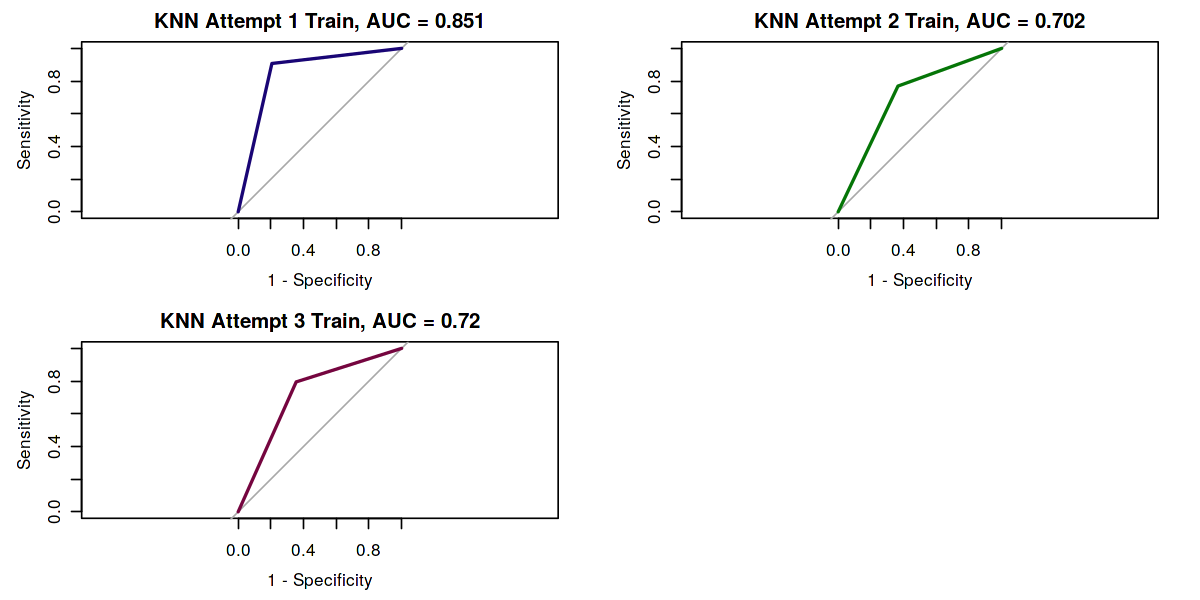

In [20]:
# Plot the ROC curve Train
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
plot(knn_ROCTrain1, main = paste("KNN Attempt 1 Train, AUC =",knn_aucTrain1), col ="#190575", legacy.axes = TRUE)
plot(knn_ROCTrain2, main = paste("KNN Attempt 2 Train, AUC =",knn_aucTrain2), col ="#057507", legacy.axes = TRUE)
plot(knn_ROCTrain3, main = paste("KNN Attempt 3 Train, AUC =",knn_aucTrain3), col ="#75053f", legacy.axes = TRUE)

#### Naïve Bayes

In [21]:
############ Attempt1 ############
## Convert the target in factor

##Model
nb_heart_pred1 <- naiveBayes(target~., data=heartPCAtarget)

##Prediction
#Train
nb_predTrain1 <- predict(nb_heart_pred1,heartPCAtarget, type="class")
nb_cfTrain1 <-confusionMatrix(nb_predTrain1,heartPCAtarget$target, positive ="1")

#Test
nb_predTest1 <- predict(nb_heart_pred1,heartPCAtargetTest, type="class")
nb_cfTest1 <-confusionMatrix(nb_predTest1,heartPCAtargetTest$target, positive ="1")

# Compute the accuracy
nb_acc1Train <-mean(nb_predTrain1 == heartPCAtarget$target) #Attempt1 Train
nb_acc1Test <-mean(nb_predTest1 == heartPCAtargetTest$target) #Attempt1 Test

In [22]:
############ Attempt2 ############
##Model
nb_heart_pred2 <- naiveBayes(target~., data=heartOriginalPCAtarget)

##Prediction
#Train
nb_predTrain2 <- predict(nb_heart_pred2,heartOriginalPCAtarget, type="class")
nb_cfTrain2 <-confusionMatrix(nb_predTrain2,heartOriginalPCAtarget$target, positive ="1")

#Test
nb_predTest2 <- predict(nb_heart_pred2,heartOriginalPCAtargetTest, type="class")
nb_cfTest2 <-confusionMatrix(nb_predTest2,heartOriginalPCAtargetTest$target, positive ="1")

# Compute the accuracy
nb_acc2Train <-mean(nb_predTrain2 == heartOriginalPCAtarget$target) #Attempt2 Train
nb_acc2Test <-mean(nb_predTest2 == heartOriginalPCAtargetTest$target) #Attempt2 Test

In [23]:
############ Attempt3 ############
##Model
nb_heart_pred3 <- naiveBayes(target~., data=heartOriginal_train)

##Prediction
#Train
nb_predTrain3 <- predict(nb_heart_pred3,heartOriginal_train, type="class")
nb_cfTrain3 <-confusionMatrix(nb_predTrain3,heartOriginal_train$target, positive ="1")

#Test
nb_predTest3 <- predict(nb_heart_pred3,heartOriginal_test, type="class")
nb_cfTest3 <-confusionMatrix(nb_predTest3,heartOriginal_test$target, positive ="1")


# Compute the accuracy
nb_acc3Train <-mean(nb_predTrain3 == heartOriginal_train$target) #Attempt3 Train
nb_acc3Test <-mean(nb_predTest3 == heartOriginal_test$target) #Attempt3 Test

In [24]:
print ("-----------NAIVE BAYES ACCURACIES-----------",quote=FALSE)
print(paste("Accuracy train Attempt1: ",nb_acc1Train),quote=FALSE)
print(paste("Accuracy test Attempt1: ",nb_acc1Test),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt2: ",nb_acc2Train),quote=FALSE)
print(paste("Accuracy test Attempt2: ",nb_acc2Test),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt3: ",nb_acc3Train),quote=FALSE)
print(paste("Accuracy test Attempt3: ",nb_acc3Test),quote=FALSE)

[1] -----------NAIVE BAYES ACCURACIES-----------


[1] Accuracy train Attempt1:  0.828703703703704


[1] Accuracy test Attempt1:  0.764705882352941


[1] --------------------------------------------


[1] Accuracy train Attempt2:  0.7


[1] Accuracy test Attempt2:  0.67032967032967


[1] --------------------------------------------


[1] Accuracy train Attempt3:  0.857142857142857


[1] Accuracy test Attempt3:  0.802197802197802


In [25]:
### ROC CURVES FOR Naïve Bayes ###
############ Attempt1 ############
nb_ROCTrain1 <- roc(heartPCAtarget$target, as.numeric(nb_predTrain1))
nb_ROCTest1 <- roc(heartPCAtargetTest$target, as.numeric(nb_predTest1))
############ Attempt2 ############
nb_ROCTrain2 <- roc(heartOriginalPCAtarget$target,as.numeric(nb_predTrain2))
nb_ROCTest2 <- roc(heartOriginalPCAtargetTest$target,as.numeric(nb_predTest2))
############ Attempt3 ############
nb_ROCTrain3 <- roc(heartOriginal_train$target, as.numeric(nb_predTrain3))
nb_ROCTest3 <- roc(heartOriginal_test$target, as.numeric(nb_predTest3))

Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


In [26]:
## Performance metrics ##
############ Attempt1 ############
#Train
nb_accTrain1 <- round(nb_acc1Train, digits = 3)
nb_senTrain1 <- round(sensitivity(nb_predTrain1,heartPCAtarget$target), digits = 3)
nb_speTrain1 <- round(specificity(nb_predTrain1,heartPCAtarget$target), digits = 3)
nb_aucTrain1 <- round(auc(nb_ROCTrain1), digits = 3)
#Test
nb_accTest1 <- round(nb_acc1Test, digits = 3)
nb_senTest1 <- round(sensitivity(nb_predTest1,heartPCAtargetTest$target), digits = 3)
nb_speTest1 <- round(specificity(nb_predTest1,heartPCAtargetTest$target), digits = 3)
nb_aucTest1 <- round(auc(nb_ROCTest1), digits = 3)
############ Attempt2 ############
#Train
nb_accTrain2 <- round(nb_acc2Train, digits = 3)
nb_senTrain2 <- round(sensitivity(nb_predTrain2,heartOriginalPCAtarget$target), digits = 3)
nb_speTrain2 <- round(specificity(nb_predTrain2,heartOriginalPCAtarget$target), digits = 3)
nb_aucTrain2 <- round(auc(nb_ROCTrain2), digits = 3)
#Test
nb_accTest2 <- round(nb_acc2Test, digits = 3)
nb_senTest2 <- round(sensitivity(nb_predTest2,heartOriginalPCAtargetTest$target), digits = 3)
nb_speTest2 <- round(specificity(nb_predTest2,heartOriginalPCAtargetTest$target), digits = 3)
nb_aucTest2 <- round(auc(nb_ROCTest2), digits = 3)
############ Attempt3 ############
#Train
nb_accTrain3 <- round(nb_acc3Train, digits = 3)
nb_senTrain3 <- round(sensitivity(nb_predTrain3,heartOriginal_train$target), digits = 3)
nb_speTrain3 <- round(specificity(nb_predTrain3,heartOriginal_train$target), digits = 3)
nb_aucTrain3 <- round(auc(nb_ROCTrain3), digits = 3)
#Test
nb_accTest3 <- round(nb_acc3Test, digits = 3)
nb_senTest3 <- round(sensitivity(nb_predTest3,heartOriginal_test$target), digits = 3)
nb_speTest3 <- round(specificity(nb_predTest3,heartOriginal_test$target), digits = 3)
nb_aucTest3 <- round(auc(nb_ROCTest3), digits = 3)

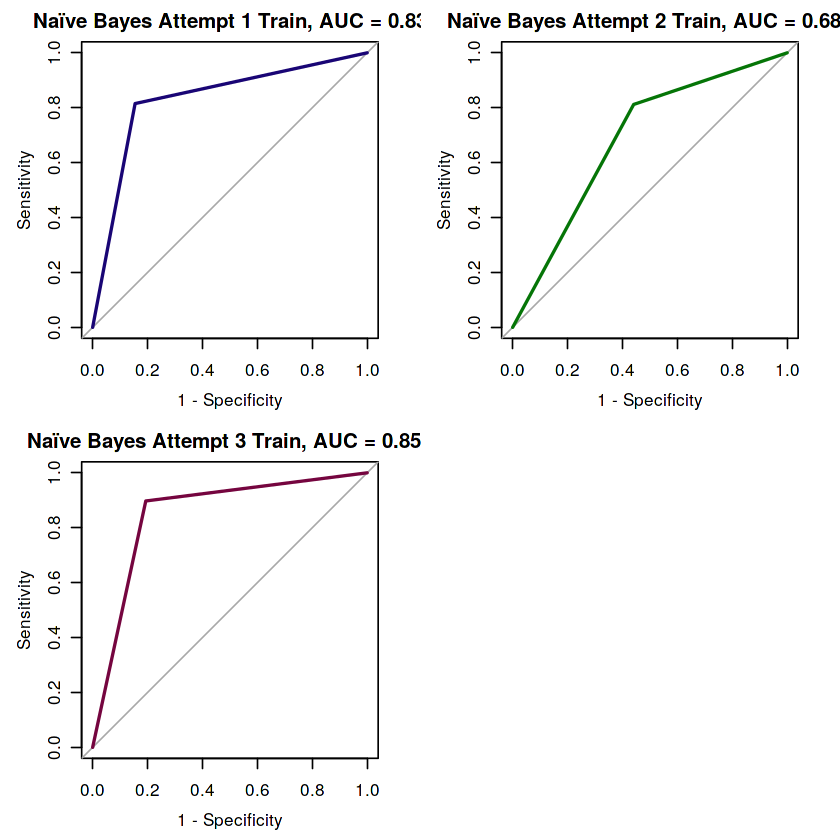

In [27]:
# Plot the ROC curve Train
par(mfrow=c(2,2))
plot(nb_ROCTrain1, main = paste("Naïve Bayes Attempt 1 Train, AUC =",nb_aucTrain1), col ="#190575", legacy.axes = TRUE)
plot(nb_ROCTrain2, main = paste("Naïve Bayes Attempt 2 Train, AUC =",nb_aucTrain2), col ="#057507", legacy.axes = TRUE)
plot(nb_ROCTrain3, main = paste("Naïve Bayes Attempt 3 Train, AUC =",nb_aucTrain3), col ="#75053f", legacy.axes = TRUE)

options(repr_option_defaults)

#### Logistic Regression Model

In [28]:
#Logistic Regression Model Train
############ Attempt1 ############
lrmodelA1 <- glm(target~PC1+PC2+PC3+PC4,data=heartPCAtarget,family="binomial")

#Prediction training
lrprobA1 <- predict(lrmodelA1,heartPCAtarget,type="response")
#mean(lrprobA1)
lrpredA1<- ifelse(lrprobA1 > 0.55,1,0)

#Accuracy
lg_accTrain1 <- mean(lrpredA1 == heartPCAtarget$target)
############ Attempt2 ############
lrmodelA2 <- glm(target~PC1+PC2,data=heartOriginalPCAtarget,family="binomial")

#Prediction training
lrprobA2 <- predict(lrmodelA2,heartOriginalPCAtarget,type="response")
#mean(lrprobA2)
lrpredA2<- ifelse(lrprobA2 > 0.55,1,0)

#Accuracy
lg_accTrain2 <- mean(lrpredA2== heartOriginalPCAtarget$target)
############ Attempt3 ############
lrmodelA3 <- glm(target~.,data=heartOriginal_train,family="binomial")

#Prediction training
lrprobA3 <- predict(lrmodelA3,heartOriginal_train,type="response")
#mean(lrprobA3)
lrpredA3<- ifelse(lrprobA3 > 0.55,1,0)

#Accuracy
lg_accTrain3 <- mean(lrpredA3==heartOriginal_train$target)

In [29]:
# Prediction of Logistic Regression Model with Testing data:
############ Attempt1 ############
lrprobA1Test <- predict(lrmodelA1,heartPCAtargetTest,type="response")
lrpredA1Test<- ifelse(lrprobA1Test > 0.55,1,0)
#Accuracy
lg_accTest1 <- mean(lrpredA1Test==heartPCAtargetTest$target)
############ Attempt2 ############
lrprobA2Test <- predict(lrmodelA2,heartOriginalPCAtargetTest,type="response")
lrpredA2Test<- ifelse(lrprobA2Test > 0.55,1,0)

#Accuract
lg_accTest2 <- mean(lrpredA2Test==heartOriginalPCAtargetTest$target)

############ Attempt3 ############
lrprobA3Test <- predict(lrmodelA3,heartOriginal_test,type="response")
lrpredA3Test<- ifelse(lrprobA3Test > 0.55,1,0)

lg_accTest3 <- mean(lrpredA3Test==heartOriginal_test$target) 

In [30]:
print ("-----------LOGISTIC REGRESSION MODEL ACCURACIES-----------",quote=FALSE)
print(paste("Accuracy train Attempt1: ",lg_accTrain1),quote=FALSE)
print(paste("Accuracy test Attempt1: ",lg_accTest1),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt2: ",lg_accTrain2),quote=FALSE)
print(paste("Accuracy test Attempt2: ",lg_accTest2),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt3: ",lg_accTrain3),quote=FALSE)
print(paste("Accuracy test Attempt3: ",lg_accTest3),quote=FALSE)

[1] -----------LOGISTIC REGRESSION MODEL ACCURACIES-----------


[1] Accuracy train Attempt1:  0.833333333333333


[1] Accuracy test Attempt1:  0.717647058823529


[1] --------------------------------------------


[1] Accuracy train Attempt2:  0.714285714285714


[1] Accuracy test Attempt2:  0.692307692307692


[1] --------------------------------------------


[1] Accuracy train Attempt3:  0.838095238095238


[1] Accuracy test Attempt3:  0.824175824175824


In [31]:
#Confusion Matrix and Statstics of the Model with the training data for the Logistic Regression Model
############ Attempt1 ############
lrpredA1 <- as.factor(lrpredA1)
lg_accTrain1 <- round(lg_accTrain1, digits = 3)
lrcmA1Train <- confusionMatrix(lrpredA1,heartPCAtarget$target)
lrbyClassA1Train <- lrcmA1Train$byClass
lg_senTrain1 <- round(lrbyClassA1Train['Sensitivity'], digits = 3)
lg_speTrain1	<- round(lrbyClassA1Train['Specificity'], digits = 3)

############ Attempt2 ############
lrpredA2 <- as.factor(lrpredA2)
lg_accTrain2 <- round(lg_accTrain2, digits = 3)
lrcmA2Train <- confusionMatrix(lrpredA2,heartOriginalPCAtarget$target)
lrbyClassA2Train <- lrcmA2Train$byClass
lg_senTrain2 <- round(lrbyClassA2Train['Sensitivity'],digits = 3)
lg_speTrain2 <- round(lrbyClassA2Train['Specificity'],digits = 3)
	
############ Attempt3 ############
lrpredA3 <- as.factor(lrpredA3)
lg_accTrain3 <- round(lg_accTrain3, digits = 3)
lrcmA3Train <- confusionMatrix(lrpredA3,heartOriginal_train$target)
lrbyClassA3Train <- lrcmA3Train$byClass
lg_senTrain3 <- round(lrbyClassA3Train['Sensitivity'],digits = 3)
lg_speTrain3	<- round(lrbyClassA3Train['Specificity'],digits = 3)

###### Calculation ROC and AUC curves with the Training data LR Model

Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


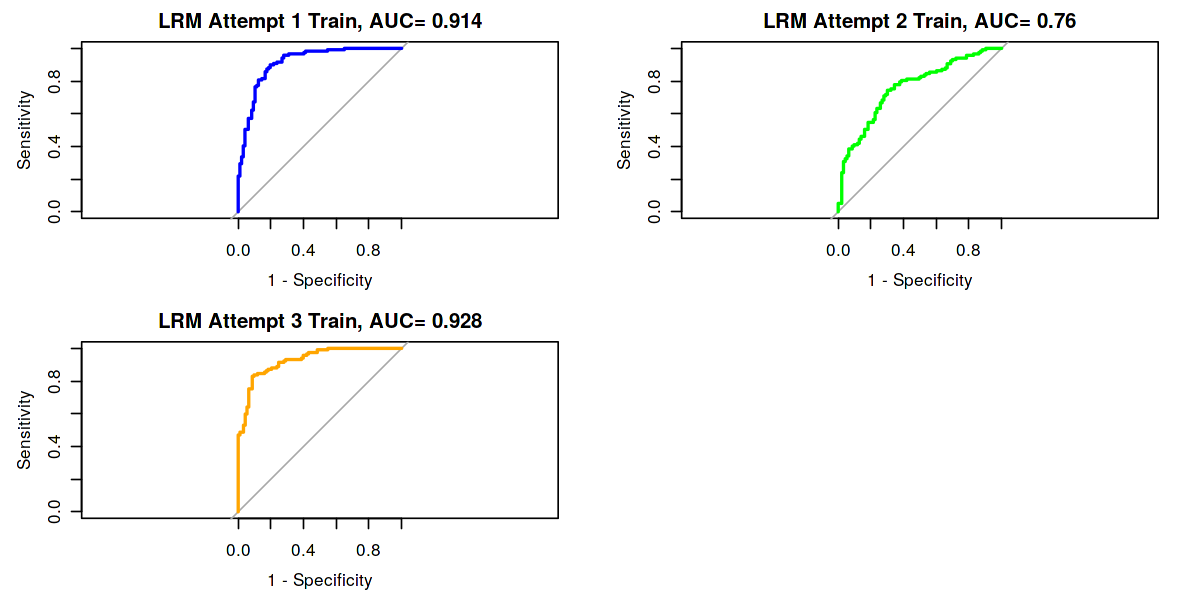

In [32]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
############ Attempt1 ############
# Create a ROC curve A1
ROCA1 <- roc(heartPCAtarget$target, lrprobA1)
# Calculate the area under the curve (AUC)
lg_aucTrain1 <- round(auc(ROCA1),digits = 3)
#print(paste('Area Under the Curve AUC Logistic Regression Model Attempt 1:',auc(ROCA1) ))
# Plot the ROC curve
plot(ROCA1, main=paste("LRM Attempt 1 Train, AUC=", lg_aucTrain1),col = "blue", legacy.axes = TRUE)
############ Attempt2 ############
# Create a ROC curve A2
ROCA2 <- roc(heartOriginalPCAtarget$target, lrprobA2)

# Calculate the area under the curve (AUC)
lg_aucTrain2 <- round(auc(ROCA2),digits = 3)
#print(paste('Area Under the Curve AUC Logistic Regression Model Attempt 2:',auc(ROCA2) ))
# Plot the ROC curve

plot(ROCA2, main=paste("LRM Attempt 2 Train, AUC=",lg_aucTrain2),col = "green", legacy.axes = TRUE)
############ Attempt3 ############
# Create a ROC curve A3
ROCA3 <- roc(heartOriginal_train$target, lrprobA3)

# Calculate the area under the curve (AUC)
lg_aucTrain3 <- round(auc(ROCA3),digits = 3)
#print(paste('Area Under the Curve AUC Logistic Regression Model Attempt 3:',auc(ROCA3) ))
# Plot the ROC curve

plot(ROCA3, main=paste("LRM Attempt 3 Train, AUC=",lg_aucTrain3),col = "orange", legacy.axes = TRUE)


In [33]:
#Confusion Matrix and Statstics of the Model with the testing data for the Logistic Regression Model
############ Attempt1 ############
lrpredA1Test <- as.factor(lrpredA1Test)
lg_accTest1 <- round(lg_accTest1, digits = 3)
lrcmA1Test <- confusionMatrix(lrpredA1Test,heartPCAtargetTest$target,positive ="1")

lrbyClassA1Test <- lrcmA1Test$byClass
lg_senTest1 <- round(lrbyClassA1Test['Sensitivity'],digits = 3)
lg_speTest1	<- round(lrbyClassA1Test['Specificity'],digits = 3)
############ Attempt2 ############
lrpredA2Test <- as.factor(lrpredA2Test)
lg_accTest2 <- round(lg_accTest2, digits = 3)
lrcmA2Test <- confusionMatrix(lrpredA2Test,heartOriginalPCAtargetTest$target,positive ="1")
lrbyClassA2Test <- lrcmA2Test$byClass
lg_senTest2 <- round(lrbyClassA2Test['Sensitivity'],digits = 3)
lg_speTest2	<- round(lrbyClassA2Test['Specificity'],digits = 3)
############ Attempt3 ############
lrpredA3Test <- as.factor(lrpredA3Test)
lg_accTest3 <- round(lg_accTest3, digits = 3)
lrcmA3Test <- confusionMatrix(lrpredA3Test,heartOriginal_test$target,positive ="1")
lrbyClassA3Test <- lrcmA3Test$byClass
lg_senTest3 <- round(lrbyClassA3Test['Sensitivity'],digits = 3)
lg_speTest3	<- round(lrbyClassA3Test['Specificity'],digits = 3)

###### Calculation ROC and AUC curves with the Testing data LR Model

In [34]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
############ Attempt1 ############
# Create a ROC curve A1 test
ROCA1Test <- roc(heartPCAtargetTest$target, lrprobA1Test)

# Calculate the area under the curve Test (AUC)
lg_aucTest1 <- round(auc(ROCA1Test),digits = 3)

############ Attempt2 ############
# Create a ROC curve A2
ROCA2Test <- roc(heartOriginalPCAtargetTest$target, lrprobA2Test)

# Calculate the area under the curve Test(AUC)
lg_aucTest2 <- round(auc(ROCA2Test),digits = 3)

############ Attempt3 ############
# Create a ROC curve A3
ROCA3Test <- roc(heartOriginal_test$target, lrprobA3Test)

# Calculate the area under the curve Test(AUC)
lg_aucTest3 <- round(auc(ROCA3Test),digits = 3)
# Plot the ROC curve

#plot(ROCA3Test, main=paste("LRM Attempt 3 Test, AUC=",lg_aucTest3),col = "orange", legacy.axes = TRUE)


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


#### Decision trees

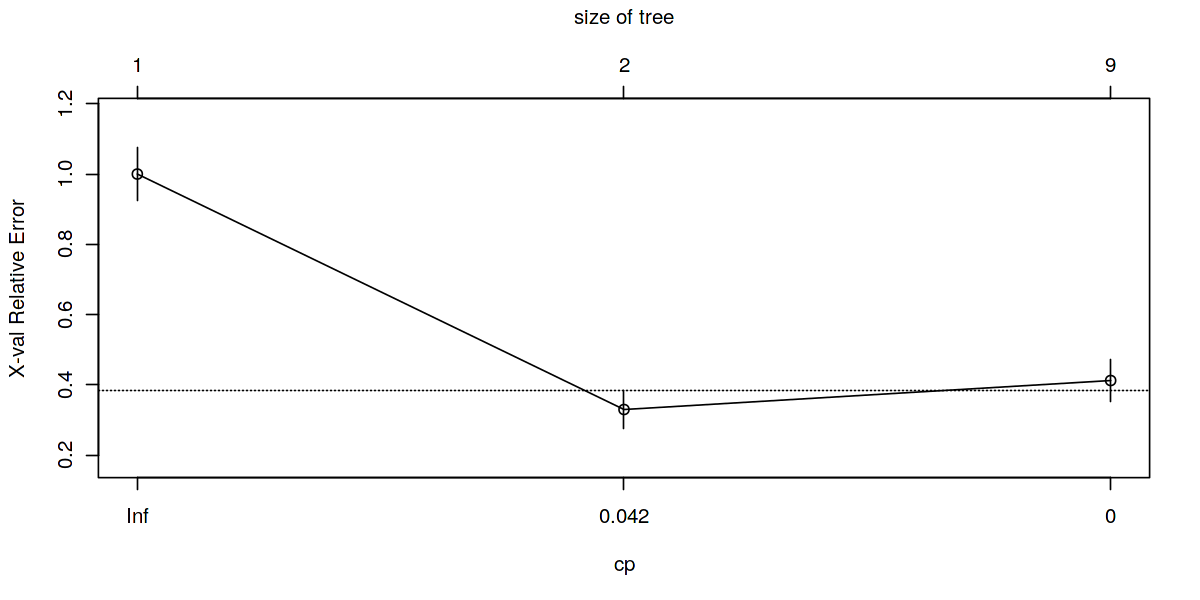

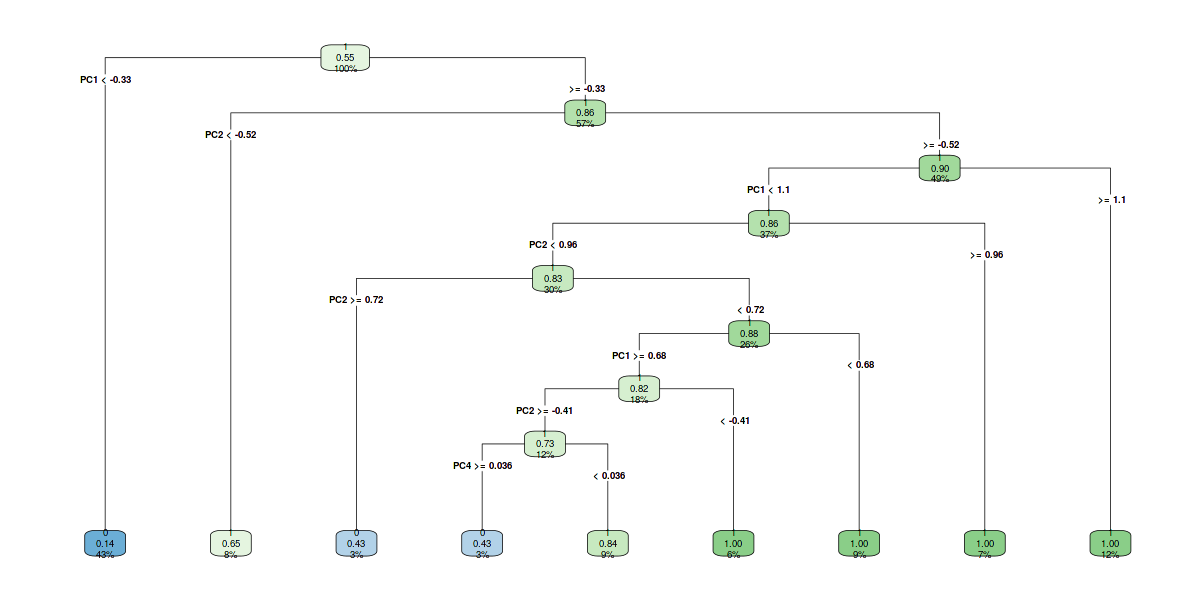

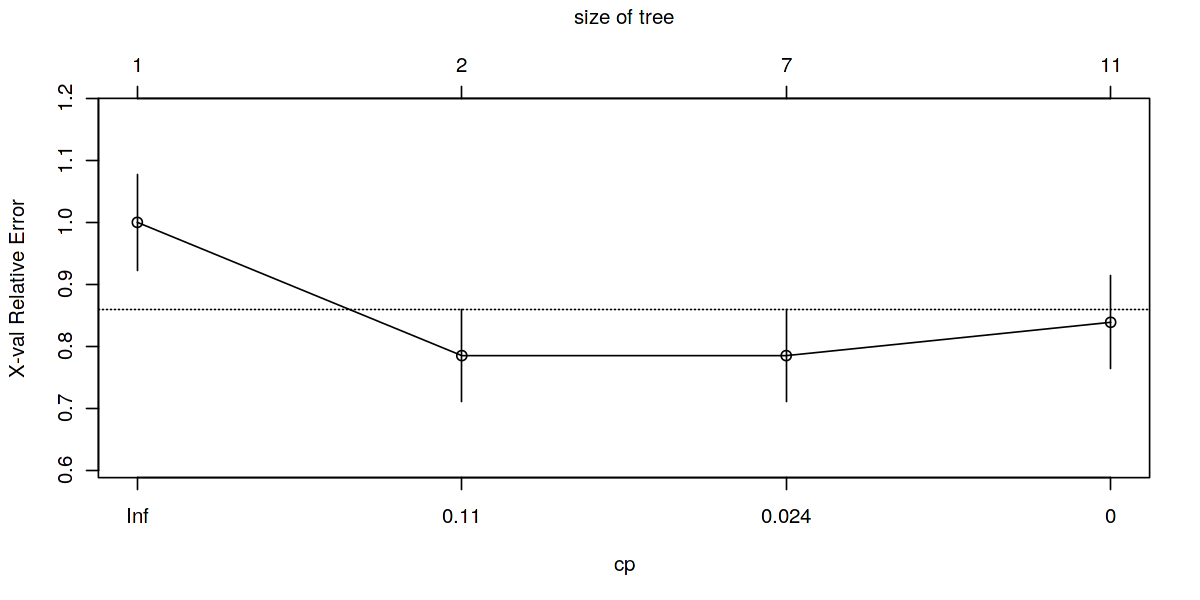

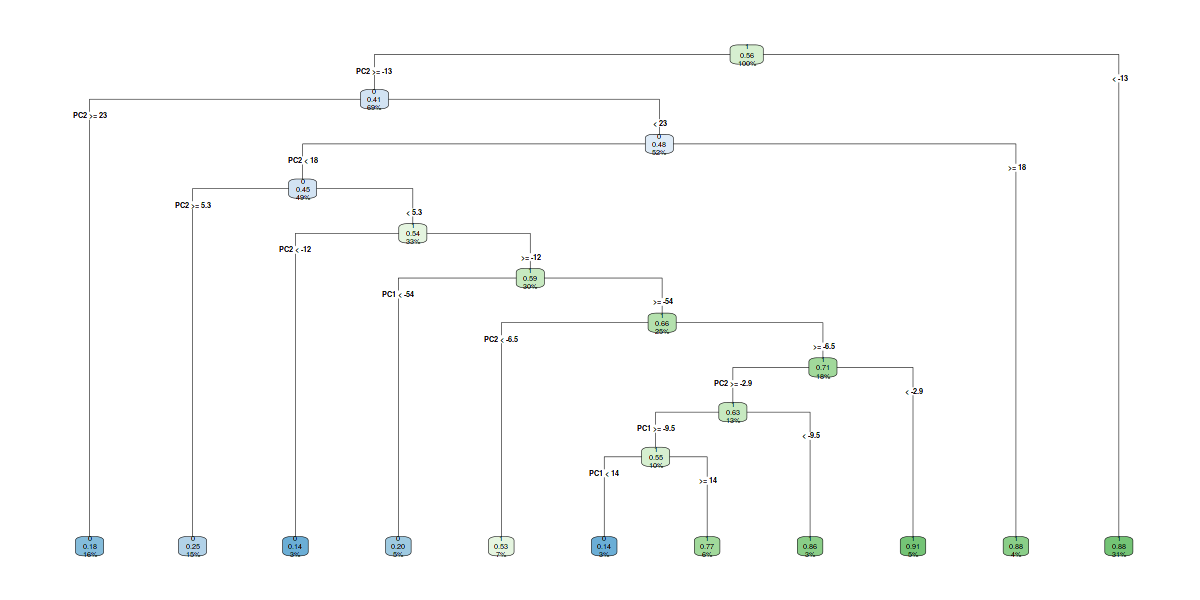

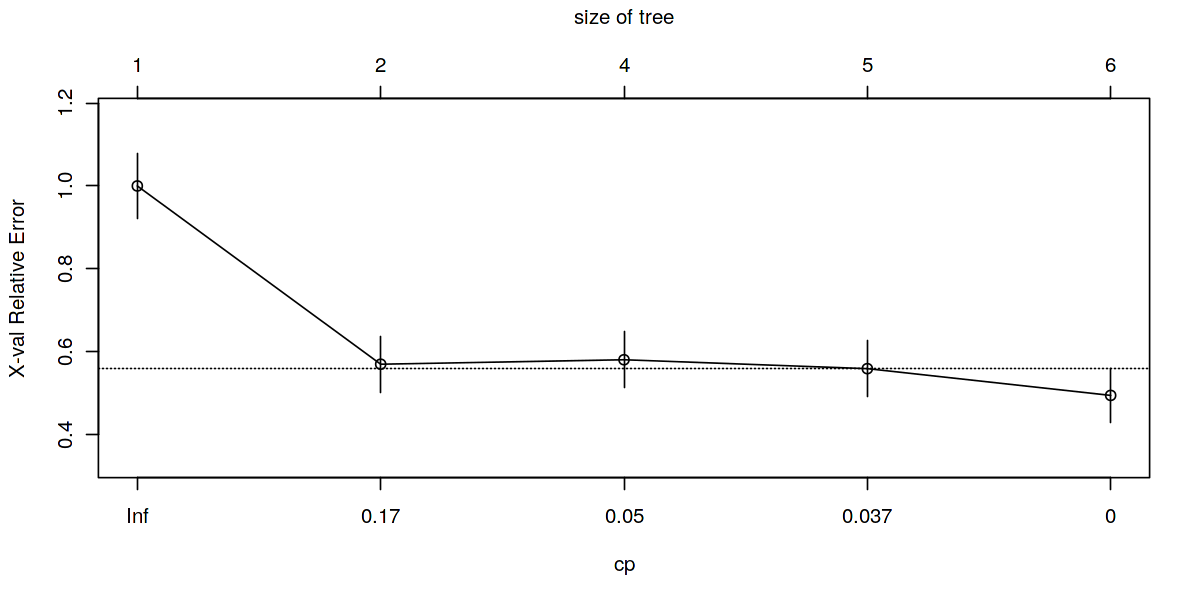

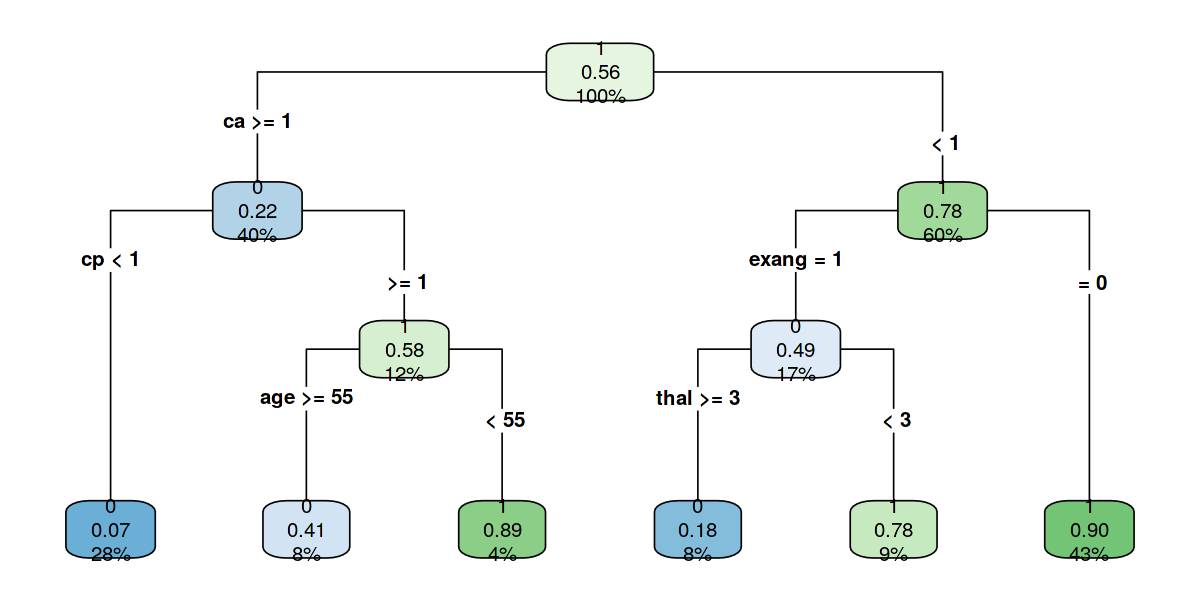

In [35]:
#Model and Prediction Decission Trees Training data
############ Attempt1 ############
DTm <- rpart(target~., data = heartPCAtarget,
method = "class",control = rpart.control(cp = 0))
plotcp(DTm)
# Prune the tree
loan_DTm_pruned <- prune(DTm, cp = 0)
rpart.plot(DTm,type=4,extra=106)
#Prediction of the model with the training data
predict_trainDT <-predict(loan_DTm_pruned, heartPCAtarget, type = 'class')

#Accuracy
dt_accTrain1 <- mean(predict_trainDT== heartPCAtarget$target)

############ Attempt2 ############
DTmA2 <- rpart(target~., data = heartOriginalPCAtarget,
method = "class",control = rpart.control(cp = 0))
plotcp(DTmA2)
# Prune the tree
loan_DTmA2_pruned <- prune(DTmA2, cp = 0)
rpart.plot(DTmA2,type=4,extra=106)

#Prediction of the model with the training data
predict_trainDTA2 <-predict(loan_DTmA2_pruned, heartOriginalPCAtarget, type = 'class')

#Accuracy
dt_accTrain2 <-  mean(predict_trainDTA2==heartOriginalPCAtarget$target)
#Confusion matrix with the training data
#table_mattrainDTA2 <- table(Predicted=predict_trainDTA2,Actual=heartOriginalPCAtarget$target)
#table_mattrainDTA2
#accuracy_TrainDTA2 <- mean(heartOriginalPCAtarget$target == predict_trainDTA2)
#print(paste('Accuracy for train Decission Tree A2:', accuracy_TrainDTA2 ))

############ Attempt3 ############
DTmA3 <- rpart(target~., data = heartOriginal_train,
method = "class",control = rpart.control(cp = 0))
plotcp(DTmA3)
# Prune the tree
loan_DTmA3_pruned <- prune(DTmA3, cp = 0)
rpart.plot(DTmA3,type=4,extra=106)

#Prediction of the model with the training data
predict_trainDTA3 <-predict(loan_DTmA3_pruned, heartOriginal_train, type = 'class')

#Accuracy
dt_accTrain3 <-  mean(predict_trainDTA3==heartOriginal_train$target)



In [36]:
#Decision Tree Testing Data
############ Attempt1 ############
#Prediction of the model with the training data
predict_trainTestDTA1 <-predict(DTm, heartPCAtargetTest, type = 'class')

############ Attempt2 ############
#Prediction of the model with the training data
predict_trainTestDTA2 <-predict(DTmA2, heartOriginalPCAtargetTest, type = 'class')

############ Attempt3 ############
#Prediction of the model with the training data
predict_trainTestDTA3 <-predict(DTmA3, heartOriginal_test, type = 'class')


In [37]:
#Confusion Matrix and Statstics of the Model with the training data for the Decission trees Models
############ Attempt1 ############
predict_trainDTf <- as.factor(predict_trainDT)
dt_accTrain1 <-  round(mean(predict_trainDTf==heartPCAtarget$target), digits=3)
dtcmA1Train <- confusionMatrix(predict_trainDTf,heartPCAtarget$target,positive ="1")
dtbyClassA1Train <- dtcmA1Train$byClass
dt_senTrain1 <- round(dtbyClassA1Train['Sensitivity'], digits=3)
dt_speTrain1 <- round(dtbyClassA1Train['Specificity'],digits=3)
############ Attempt2 ############
predict_trainDTA2f <- as.factor(predict_trainDTA2)
dt_accTrain2 <-  round(mean(predict_trainDTA2f==heartOriginalPCAtarget$target), digits=3)
dtcmA2Train <- confusionMatrix(predict_trainDTA2f,heartOriginalPCAtarget$target,positive ="1")
dtbyClassA2Train <- dtcmA2Train$byClass
dt_senTrain2 <- round(dtbyClassA2Train['Sensitivity'],digits=3)
dt_speTrain2 <- round(dtbyClassA2Train['Specificity'],digits=3)
############ Attempt3 ############
predict_trainDTA3f <- as.factor(predict_trainDTA3)
dt_accTrain3 <-  round(mean(predict_trainDTA3f==heartOriginal_train$target), digits=3)
dtcmA3Train <- confusionMatrix(predict_trainDTA3f,heartOriginal_train$target,positive ="1")
dtbyClassA3Train <- dtcmA3Train$byClass
dt_senTrain3 <- round(dtbyClassA3Train['Sensitivity'],digits=3)
dt_speTrain3 <- round(dtbyClassA3Train['Specificity'],digits=3)

###### Calculation ROC and AUC curves with the Training data Decission Trees Models

Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


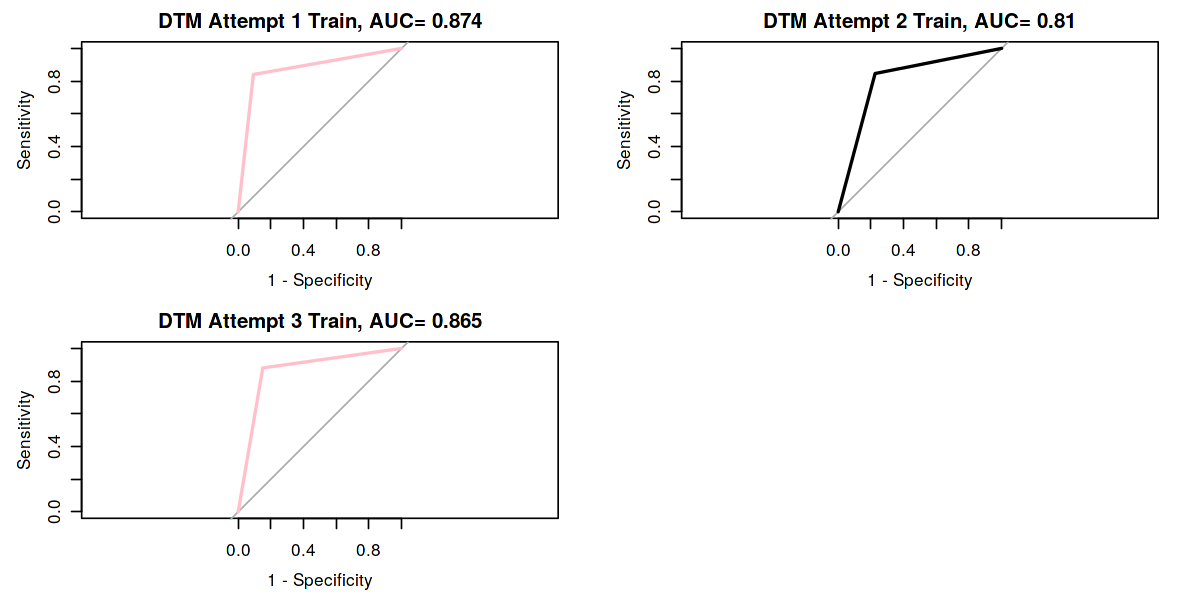

In [38]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
############ Attempt1 ############
#convert factor to numeric
predict_trainDTn <- as.numeric(predict_trainDTf)
# Create a ROC curve A1 train DT
ROCA1TrainDT <- roc(heartPCAtarget$target, predict_trainDTn)

# Calculate the area under the curve Train DT (AUC)
dt_aucTrain1 <- round(auc(ROCA1TrainDT),digits = 3)
#print(paste('Area Under the Curve AUC Decission Tree Model Training Data Attempt 1:',auc(ROCA1TrainDT) ))
# Plot the ROC curve
plot(ROCA1TrainDT, main=paste("DTM Attempt 1 Train, AUC=",dt_aucTrain1),col = "pink", legacy.axes = TRUE)
############ Attempt2 ############
#convert factor to numeric
predict_trainDTA2n <- as.numeric(predict_trainDTA2f)
# Create a ROC curve A2
ROCA2TrainDT <- roc(heartOriginalPCAtarget$target, predict_trainDTA2n)

# Calculate the area under the curve Test(AUC)
dt_aucTrain2 <- round(auc(ROCA2TrainDT),digits = 3)
#print(paste('Area Under the Curve AUC Decission Tree Model Training Data Attempt 2:',auc(ROCA2TrainDT) ))
# Plot the ROC curve

plot(ROCA2TrainDT, main=paste("DTM Attempt 2 Train, AUC=",dt_aucTrain2),col = "black", legacy.axes = TRUE)
############ Attempt3 ############
#convert factor to numeric
predict_trainDTA3n <- as.numeric(predict_trainDTA3f)
# Create a ROC curve A3
ROCA3TrainDT <- roc(heartOriginal_train$target, predict_trainDTA3n)

# Calculate the area under the curve Test(AUC)
dt_aucTrain3 <- round(auc(ROCA3TrainDT),digits = 3)
#print(paste('Area Under the Curve AUC Decission Tree Model Training Data Attempt 3:',auc(ROCA3TrainDT) ))
# Plot the ROC curve

plot(ROCA3TrainDT, main=paste("DTM Attempt 3 Train, AUC=",dt_aucTrain3),col = "pink", legacy.axes = TRUE)

In [39]:
#Confusion Matrix and Statstics of the Model with the testing data for the Decission trees Models
############ Attempt1 ############
predict_testDTf <- as.factor(predict_trainTestDTA1)
dt_accTest1 <-  round(mean(predict_testDTf==heartPCAtargetTest$target), digits=3)
dtcmA1Test <- confusionMatrix(predict_testDTf,heartPCAtargetTest$target,positive ="1")
dtbyClassA1Test <- dtcmA1Test$byClass
dt_senTest1 <- round(dtbyClassA1Test['Sensitivity'], digits=3)
dt_speTest1 <- round(dtbyClassA1Test['Specificity'],digits=3)
############ Attempt2 ############
predict_testDTA2f <- as.factor(predict_trainTestDTA2)
dt_accTest2 <-  round(mean(predict_testDTA2f==heartOriginalPCAtargetTest$target), digits=3)
dtcmA2Test <- confusionMatrix(predict_testDTA2f,heartOriginalPCAtargetTest$target,positive ="1")
dtbyClassA2Test <- dtcmA2Test$byClass
dt_senTest2 <- round(dtbyClassA2Test['Sensitivity'],digits=3)
dt_speTest2 <- round(dtbyClassA2Test['Specificity'],digits=3)
############ Attempt3 ############
predict_testDTA3f <- as.factor(predict_trainTestDTA3)
dt_accTest3 <-  round(mean(predict_testDTA3f==heartOriginal_test$target), digits=3)
dtcmA3Test <- confusionMatrix(predict_testDTA3f,heartOriginal_test$target,positive ="1")
dtbyClassA3Test <- dtcmA3Test$byClass
dt_senTest3 <- round(dtbyClassA3Test['Sensitivity'],digits=3)
dt_speTest3 <- round(dtbyClassA3Test['Specificity'],digits=3)

###### Calculation ROC and AUC curves with the Testing data Decission Trees Models

In [40]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
############ Attempt1 ############
#convert factor to numeric
predict_testDTn <- as.numeric(predict_testDTf)
# Create a ROC curve A1 train DT
ROCA1TestDT <- roc(heartPCAtargetTest$target, predict_testDTn)

# Calculate the area under the curve Train DT (AUC)
dt_aucTest1 <- round(auc(ROCA1TestDT),digits=3)

############ Attempt2 ############
#convert factor to numeric
predict_testDTA2n <- as.numeric(predict_testDTA2f)
# Create a ROC curve A2
ROCA2TestDT <- roc(heartOriginalPCAtargetTest$target, predict_testDTA2n)

# Calculate the area under the curve Test(AUC)
dt_aucTest2 <- round(auc(ROCA2TestDT),digits=3)
############ Attempt3 ############
#convert factor to numeric
predict_testDTA3n <- as.numeric(predict_testDTA3f)
# Create a ROC curve A3
ROCA3TestDT <- roc(heartOriginal_test$target, predict_testDTA3n)

# Calculate the area under the curve Test(AUC)
dt_aucTest3 <- round(auc(ROCA3TestDT),digits=3)

Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


In [41]:
print ("-----------DECISION TREES MODEL ACCURACIES-----------",quote=FALSE)
print(paste("Accuracy train Attempt1: ",dt_accTrain1),quote=FALSE)
print(paste("Accuracy test Attempt1: ",dt_accTest1),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt2: ",dt_accTrain2),quote=FALSE)
print(paste("Accuracy test Attempt2: ",dt_accTest2),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt3: ",dt_accTrain3),quote=FALSE)
print(paste("Accuracy test Attempt3: ",dt_accTest3),quote=FALSE)

[1] -----------DECISION TREES MODEL ACCURACIES-----------


[1] Accuracy train Attempt1:  0.87


[1] Accuracy test Attempt1:  0.765


[1] --------------------------------------------


[1] Accuracy train Attempt2:  0.814


[1] Accuracy test Attempt2:  0.637


[1] --------------------------------------------


[1] Accuracy train Attempt3:  0.867


[1] Accuracy test Attempt3:  0.736


#### Random Forest

In [42]:
library("randomForest")
#Random Forest Training data
############ Attempt1 ############
RFA1 <- randomForest(target~., data = heartPCAtarget)
#Predicted model of the random forest training data
RFpredTrainA1 <- predict(RFA1,heartPCAtarget)
#Predicted model of the random forest testing data
RFpredTestA1 <- predict(RFA1,heartPCAtargetTest)

############ Attempt2 ############
RFA2 <- randomForest(target~., data = heartOriginalPCAtarget)
#Predicted model of the random forest training data
RFpredTrainA2 <- predict(RFA2,heartOriginalPCAtarget)
# Predicted model of the random forest testing data
RFpredTestA2 <- predict(RFA2,heartOriginalPCAtargetTest)

############ Attempt3 ############
RFA3 <- randomForest(target~., data = heartOriginal_train)
#Predicted model of the random forest training data
RFpredTrainA3 <- predict(RFA3,heartOriginal_train)
# Predicted model of the random forest testing data
RFpredTestA3 <- predict(RFA3,heartOriginal_test)

randomForest 4.6-14


Type rfNews() to see new features/changes/bug fixes.



Attaching package: ‘randomForest’



The following object is masked from ‘package:gridExtra’:

    combine



The following object is masked from ‘package:dplyr’:

    combine



The following object is masked from ‘package:ggplot2’:

    margin



In [43]:
#Confusion Matrix Training Data Random Forest
############ Attempt1 ############
RFpredTrainA1f  <- as.factor(RFpredTrainA1)
rt_accTrain1 <- round(mean(RFpredTrainA1f ==heartPCAtarget$target), digits=3)
rtcmA1Train <- confusionMatrix(RFpredTrainA1f,heartPCAtarget$target)
rtbyClassA1Train <- rtcmA1Train$byClass
rt_senTrain1 <- round(rtbyClassA1Train['Sensitivity'], digits=3)
rt_speTrain1 <- round(rtbyClassA1Train['Specificity'],digits=3)
############ Attempt2 ############
RFpredTrainA2f  <- as.factor(RFpredTrainA2)
rt_accTrain2 <- round(mean(RFpredTrainA2f ==heartOriginalPCAtarget$target), digits=3)
rtcmA2Train <- confusionMatrix(RFpredTrainA2f,heartOriginalPCAtarget$target)
rtbyClassA2Train <- rtcmA2Train$byClass
rt_senTrain2 <- round(rtbyClassA2Train['Sensitivity'], digits=3)
rt_speTrain2 <- round(rtbyClassA2Train['Specificity'],digits=3)
############ Attempt3 ############
RFpredTrainA3f  <- as.factor(RFpredTrainA3)
rt_accTrain3 <- round(mean(RFpredTrainA3f ==heartOriginal_train$target), digits=3)
rtcmA3Train <- confusionMatrix(RFpredTrainA3f,heartOriginal_train$target)
rtbyClassA3Train <- rtcmA3Train$byClass
rt_senTrain3 <- round(rtbyClassA3Train['Sensitivity'], digits=3)
rt_speTrain3 <- round(rtbyClassA3Train['Specificity'],digits=3)


###### Calculation ROC and AUC curves with the Training data Random Forest Models

Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


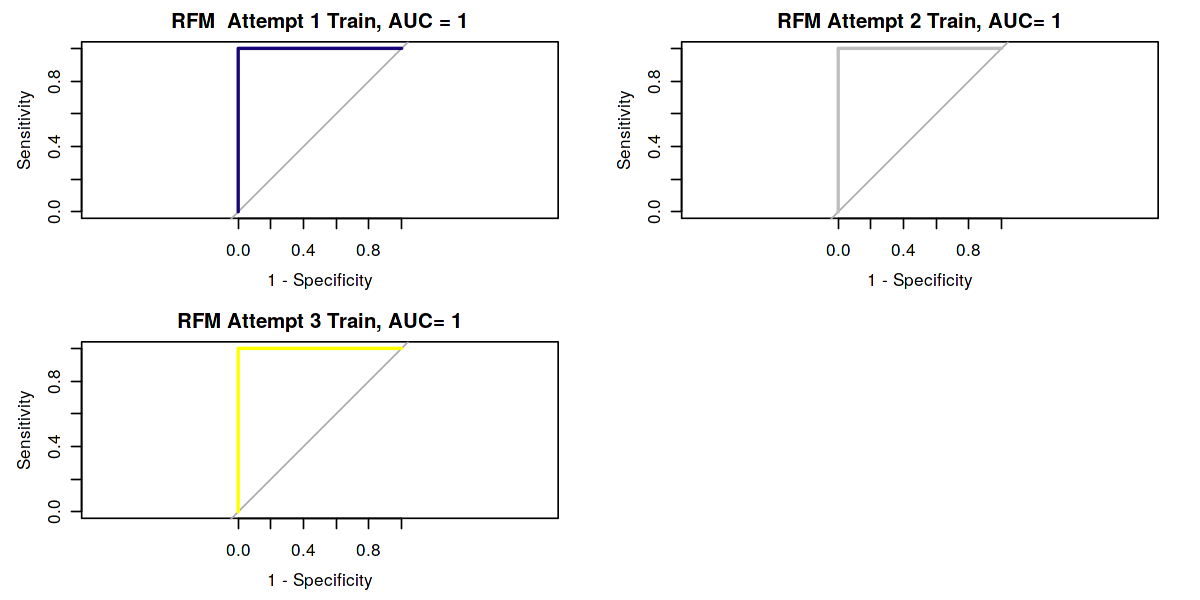

In [44]:
############ Attempt1 ############
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
#convert factor to numeric
RFpredTrainA1n <- as.numeric(RFpredTrainA1f)
# Create a ROC curve A1 train DT
ROCA1TrainRF <- roc(heartPCAtarget$target, RFpredTrainA1n)

# Calculate the area under the curve Train DT (AUC)
rt_aucTrain1 <- round(auc(ROCA1TrainRF),digits=3)
# Plot the ROC curve
plot(ROCA1TrainRF, main = paste("RFM  Attempt 1 Train, AUC =",rt_aucTrain1), col ="#190575", legacy.axes = TRUE)
############ Attempt2 ############
#convert factor to numeric
RFpredTrainA2n <- as.numeric(RFpredTrainA2f)
# Create a ROC curve A2
ROCA2TrainRF <- roc(heartOriginalPCAtarget$target, RFpredTrainA2n)

# Calculate the area under the curve Train(AUC)
rt_aucTrain2 <- round(auc(ROCA2TrainRF),digits=3)
# Plot the ROC curve
plot(ROCA2TrainRF, main=paste("RFM Attempt 2 Train, AUC=",rt_aucTrain2), col = "gray", legacy.axes = TRUE)
############ Attempt3 ############
#convert factor to numeric
RFpredTrainA3n <- as.numeric(RFpredTrainA3f)
# Create a ROC curve A3
ROCA3TrainRF <- roc(heartOriginal_train$target, RFpredTrainA3n)

# Calculate the area under the curve Train(AUC)
rt_aucTrain3 <- round(auc(ROCA3TrainRF),digits=3)
# Plot the ROC curve
plot(ROCA3TrainRF, main=paste("RFM Attempt 3 Train, AUC=",rt_aucTrain3),col = "yellow", legacy.axes = TRUE)

In [45]:

#Confusion Matrix and Statstics of the Model with the testing data for the Random Forest Models:
############ Attempt1 ############
RFpredTestA1f  <- as.factor(RFpredTestA1)
rt_accTest1 <-  round(mean(RFpredTestA1f ==heartPCAtargetTest$target), digits=3)
rtcmA1Test <- confusionMatrix(RFpredTestA1f ,heartPCAtargetTest$target,positive ="1")
rtbyClassA1Test <- rtcmA1Test$byClass
rt_senTest1 <- round(rtbyClassA1Test['Sensitivity'], digits=3)
rt_speTest1 <- round(rtbyClassA1Test['Specificity'],digits=3)
############ Attempt2 ############
RFpredTestA2f  <- as.factor(RFpredTestA2)
rt_accTest2 <-  round(mean(RFpredTestA2f==heartOriginalPCAtargetTest$target), digits=3)
rtcmA2Test <- confusionMatrix(RFpredTestA2f,heartOriginalPCAtargetTest$target,positive ="1")
rtbyClassA2Test <- rtcmA2Test$byClass
rt_senTest2 <- round(rtbyClassA2Test['Sensitivity'],digits=3)
rt_speTest2 <- round(rtbyClassA2Test['Specificity'],digits=3)
############ Attempt3 ############
RFpredTestA3f  <- as.factor(RFpredTestA3)
rt_accTest3 <-  round(mean(RFpredTestA3f==heartOriginal_test$target), digits=3)
rtcmA3Test <- confusionMatrix(RFpredTestA3f,heartOriginal_test$target,positive ="1")
rtbyClassA3Test <- rtcmA3Test$byClass
rt_senTest3 <- round(rtbyClassA3Test['Sensitivity'],digits=3)
rt_speTest3 <- round(rtbyClassA3Test['Specificity'],digits=3)

###### Calculation ROC and AUC curves with the Testing data Random Forest Models

In [46]:
############ Attempt1 ############
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
#convert factor to numeric
RFpredTestA1n <- as.numeric(RFpredTestA1f)
# Create a ROC curve A1 train DT
ROCA1TestRF <- roc(heartPCAtargetTest$target, RFpredTestA1n)

# Calculate the area under the curve Test DT (AUC)
rt_aucTest1 <- round(auc(ROCA1TestRF),digits=3)

############ Attempt2 ############
#convert factor to numeric
RFpredTestA2n <- as.numeric(RFpredTestA2f)
# Create a ROC curve A2
ROCA2TestRF <- roc(heartOriginalPCAtargetTest$target, RFpredTestA2n)

# Calculate the area under the curve Test(AUC)
rt_aucTest2 <- round(auc(ROCA2TestRF),digits=3)
############ Attempt3 ############
#convert factor to numeric
RFpredTestA3n <- as.numeric(RFpredTestA3f)
# Create a ROC curve A3
ROCA3TestRF <- roc(heartOriginal_test$target, RFpredTestA3n)

# Calculate the area under the curve Test(AUC)
rt_aucTest3 <- round(auc(ROCA3TestRF),digits=3)

Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


In [47]:
print ("-----------RANDOM FOREST MODEL ACCURACIES-----------",quote=FALSE)
print(paste("Accuracy train Attempt1: ",rt_accTrain1),quote=FALSE)
print(paste("Accuracy test Attempt1: ",rt_accTest1),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt2: ",rt_accTrain2),quote=FALSE)
print(paste("Accuracy test Attempt2: ",rt_accTest2),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt3: ",rt_accTrain3),quote=FALSE)
print(paste("Accuracy test Attempt3: ",rt_accTest3),quote=FALSE)

[1] -----------RANDOM FOREST MODEL ACCURACIES-----------


[1] Accuracy train Attempt1:  1


[1] Accuracy test Attempt1:  0.765


[1] --------------------------------------------


[1] Accuracy train Attempt2:  1


[1] Accuracy test Attempt2:  0.703


[1] --------------------------------------------


[1] Accuracy train Attempt3:  1


[1] Accuracy test Attempt3:  0.835


#### SVM

In [48]:
############ Attempt1 LINEAR ############
# Fitting SVM to the Training set
SVM_linear1 <- svm(formula = target~ .,
                 data = heartPCAtarget,
                 type = 'C-classification',
                 kernel = 'linear')

# Predicting the results
SVM_linear1predTrain <- predict(SVM_linear1, newdata = heartPCAtarget) #Train
SVM_linear1predTest <- predict(SVM_linear1, newdata = heartPCAtargetTest) #Test

# Making the Confusion Matrix
print("Train Attempt1",quote=FALSE)
table(SVM_linear1predTrain, heartPCAtarget$target,dnn=c("Prediction","Actual"))
print("Test Attempt1",quote=FALSE)
table(SVM_linear1predTest, heartPCAtargetTest$target,dnn=c("Prediction","Actual"))

# Compute the accuracy
SVM_linearAcc1Train <-mean(SVM_linear1predTrain == heartPCAtarget$target) #Attempt1 Train
SVM_linearAcc1Test <-mean(SVM_linear1predTest == heartPCAtargetTest$target) #Attempt1 Test

[1] Train Attempt1


          Actual
Prediction  0  1
         0 82 21
         1 15 98

[1] Test Attempt1


          Actual
Prediction  0  1
         0 30  9
         1 10 36

In [49]:
############ Attempt1 RADIAL ############
# Fitting SVM to the Training set
SVM_radial1 <- svm(formula = target~ .,
                 data = heartPCAtarget,
                 type = 'C-classification',
                 kernel = 'radial')

# Predicting the results
SVM_radial1predTrain <- predict(SVM_radial1, newdata = heartPCAtarget) #Train
SVM_radial1predTest <- predict(SVM_radial1, newdata = heartPCAtargetTest) #Test
# Making the Confusion Matrix
print("Train Attempt1 RADIAL",quote=FALSE)
table(SVM_radial1predTrain, heartPCAtarget$target,dnn=c("Prediction","Actual"))
SVM_cfTrain1 <-confusionMatrix(SVM_radial1predTrain,heartPCAtarget$target, positive ="1")

print("Test Attempt1 RADIAL",quote=FALSE)
table(SVM_radial1predTest, heartPCAtargetTest$target,dnn=c("Prediction","Actual"))
SVM_cfTest1 <-confusionMatrix(SVM_radial1predTest,heartPCAtargetTest$target, positive ="1")

# Compute the accuracy
SVM_radialAcc1Train <-mean(SVM_radial1predTrain == heartPCAtarget$target) #Attempt1 Train
SVM_radialAcc1Test <-mean(SVM_radial1predTest == heartPCAtargetTest$target) #Attempt1 Test

[1] Train Attempt1 RADIAL


          Actual
Prediction   0   1
         0  76  11
         1  21 108

[1] Test Attempt1 RADIAL


          Actual
Prediction  0  1
         0 30  7
         1 10 38

In [50]:
############ Attempt1 POLYNOMIAL ############
# Fitting SVM to the Training set
SVM_polynomial1 <- svm(formula = target~ .,
                 data = heartPCAtarget,
                 type = 'C-classification',
                 kernel = 'polynomial')

# Predicting the results
SVM_polynomial1predTrain <- predict(SVM_polynomial1, newdata = heartPCAtarget) #Train
SVM_polynomial1predTest <- predict(SVM_polynomial1, newdata = heartPCAtargetTest) #Test
# Making the Confusion Matrix
print("Train Attempt1 POLYNOMIAL",quote=FALSE)
table(SVM_polynomial1predTrain, heartPCAtarget$target,dnn=c("Prediction","Actual"))
print("Test Attempt1 POLYNOMIAL",quote=FALSE)
table(SVM_polynomial1predTest, heartPCAtargetTest$target,dnn=c("Prediction","Actual"))
# Compute the accuracy
SVM_polynomialAcc1Train <-mean(SVM_polynomial1predTrain == heartPCAtarget$target) #Attempt1 Train
SVM_polynomialAcc1Test <-mean(SVM_polynomial1predTest == heartPCAtargetTest$target) #Attempt1 Test

[1] Train Attempt1 POLYNOMIAL


          Actual
Prediction   0   1
         0  80  16
         1  17 103

[1] Test Attempt1 POLYNOMIAL


          Actual
Prediction  0  1
         0 31  7
         1  9 38

In [51]:
############ Attempt1 SIGMOID ############
# Fitting SVM to the Training set
SVM_sigmoid1 <- svm(formula = target~ .,
                 data = heartPCAtarget,
                 type = 'C-classification',
                 kernel = 'sigmoid')

# Predicting the results
SVM_sigmoid1predTrain <- predict(SVM_sigmoid1, newdata = heartPCAtarget) #Train
SVM_sigmoid1predTest <- predict(SVM_sigmoid1, newdata = heartPCAtargetTest) #Test
# Making the Confusion Matrix
print("Train Attempt1 SIGMOID",quote=FALSE)
table(SVM_sigmoid1predTrain, heartPCAtarget$target,dnn=c("Prediction","Actual"))
print("Test Attempt1 SIGMOID",quote=FALSE)
table(SVM_sigmoid1predTest, heartPCAtargetTest$target,dnn=c("Prediction","Actual"))
# Compute the accuracy
SVM_sigmoidAcc1Train <-mean(SVM_sigmoid1predTrain == heartPCAtarget$target) #Attempt1 Train
SVM_sigmoidAcc1Test <-mean(SVM_sigmoid1predTest == heartPCAtargetTest$target) #Attempt1 Test

[1] Train Attempt1 SIGMOID


          Actual
Prediction  0  1
         0 68 34
         1 29 85

[1] Test Attempt1 SIGMOID


          Actual
Prediction  0  1
         0 27 20
         1 13 25

In [52]:
print ("-----------SVM ATTEMPT1 LINEAR ACCURACY-----------",quote=FALSE)
print(paste("Accuracy train: ",SVM_linearAcc1Train),quote=FALSE)
print(paste("Accuracy test: ",SVM_linearAcc1Test),quote=FALSE)

print ("-----------SVM ATTEMPT1 RADIAL ACCURACY-----------",quote=FALSE)
print(paste("Accuracy train: ",SVM_radialAcc1Train),quote=FALSE)
print(paste("Accuracy test: ",SVM_radialAcc1Test),quote=FALSE)

print ("---------SVM ATTEMPT1 POLYNOMIAL ACCURACY---------",quote=FALSE)
print(paste("Accuracy train: ",SVM_polynomialAcc1Train),quote=FALSE)
print(paste("Accuracy test: ",SVM_polynomialAcc1Test),quote=FALSE)

print ("----------SVM ATTEMPT1 SIGMOID ACCURACY-----------",quote=FALSE)
print(paste("Accuracy train: ",SVM_sigmoidAcc1Train),quote=FALSE)
print(paste("Accuracy test: ",SVM_sigmoidAcc1Test),quote=FALSE)

[1] -----------SVM ATTEMPT1 LINEAR ACCURACY-----------


[1] Accuracy train:  0.833333333333333


[1] Accuracy test:  0.776470588235294


[1] -----------SVM ATTEMPT1 RADIAL ACCURACY-----------


[1] Accuracy train:  0.851851851851852


[1] Accuracy test:  0.8


[1] ---------SVM ATTEMPT1 POLYNOMIAL ACCURACY---------


[1] Accuracy train:  0.847222222222222


[1] Accuracy test:  0.811764705882353


[1] ----------SVM ATTEMPT1 SIGMOID ACCURACY-----------


[1] Accuracy train:  0.708333333333333


[1] Accuracy test:  0.611764705882353


**Comment** Because the highest accuracy is obtained with the Radial kernel, the remaing Attempts will be computed with this kernel

In [53]:
############ Attempt2 ############
# Fitting SVM to the Training set
SVM_radial2 <- svm(formula = target~ .,
                 data = heartOriginalPCAtarget,
                 type = 'C-classification',
                 kernel = 'radial')

# Predicting the results
SVM_radial2predTrain <- predict(SVM_radial2, newdata = heartOriginalPCAtarget) #Train
SVM_radial2predTest <- predict(SVM_radial2, newdata = heartOriginalPCAtargetTest) #Test

# Making the Confusion Matrix
SVM_cfTrain2 <-confusionMatrix(SVM_radial2predTrain,heartOriginalPCAtarget$target, positive ="1")
SVM_cfTest2 <-confusionMatrix(SVM_radial2predTest,heartOriginalPCAtargetTest$target, positive ="1")

# Compute the accuracy
SVM_radialAcc2Train <-mean(SVM_radial2predTrain == heartOriginalPCAtarget$target) #Attempt2 Train
SVM_radialAcc2Test <-mean(SVM_radial2predTest == heartOriginalPCAtargetTest$target) #Attempt2 Test

In [54]:
############ Attempt3 ############
# Fitting SVM to the Training set
SVM_radial3 <- svm(formula = target~ .,
                 data = heartOriginal_train,
                 type = 'C-classification',
                 kernel = 'radial')

# Predicting the results
SVM_radial3predTrain <- predict(SVM_radial3, newdata = heartOriginal_train) #Train
SVM_radial3predTest <- predict(SVM_radial3, newdata = heartOriginal_test) #Test

# Making the Confusion Matrix
SVM_cfTrain3 <-confusionMatrix(SVM_radial3predTrain,heartOriginal_train$target, positive ="1")
SVM_cfTest3 <-confusionMatrix(SVM_radial3predTest,heartOriginal_test$target, positive ="1")

# Compute the accuracy

SVM_radialAcc3Train <-mean(SVM_radial3predTrain == heartOriginal_train$target) #Attempt3 Train
SVM_radialAcc3Test <-mean(SVM_radial3predTest == heartOriginal_test$target) #Attempt3 Test

In [55]:
print ("------------SVM RADIAL ACCURACIES-----------",quote=FALSE)
print(paste("Accuracy train Attempt1: ",SVM_radialAcc1Train),quote=FALSE)
print(paste("Accuracy test Attempt1: ",SVM_radialAcc1Test),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt2: ",SVM_radialAcc2Train),quote=FALSE)
print(paste("Accuracy test Attempt2: ",SVM_radialAcc2Test),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt3: ",SVM_radialAcc3Train),quote=FALSE)
print(paste("Accuracy test Attempt3: ",SVM_radialAcc3Test),quote=FALSE)

[1] ------------SVM RADIAL ACCURACIES-----------


[1] Accuracy train Attempt1:  0.851851851851852


[1] Accuracy test Attempt1:  0.8


[1] --------------------------------------------


[1] Accuracy train Attempt2:  0.719047619047619


[1] Accuracy test Attempt2:  0.681318681318681


[1] --------------------------------------------


[1] Accuracy train Attempt3:  0.904761904761905


[1] Accuracy test Attempt3:  0.78021978021978


In [56]:
### ROC CURVES FOR SVM RADIAL ###
############ Attempt1 ############
SVM_ROCTrain1 <- roc(heartPCAtarget$target, as.numeric(SVM_radial1predTrain))
SVM_ROCTest1 <- roc(heartPCAtargetTest$target, as.numeric(SVM_radial1predTest))
############ Attempt2 ############
SVM_ROCTrain2 <- roc(heartOriginalPCAtarget$target, as.numeric(SVM_radial2predTrain))
SVM_ROCTest2 <- roc(heartOriginalPCAtargetTest$target, as.numeric(SVM_radial2predTest))
############ Attempt3 ############
SVM_ROCTrain3 <- roc(heartOriginal_train$target, as.numeric(SVM_radial3predTrain))
SVM_ROCTest3 <- roc(heartOriginal_test$target, as.numeric(SVM_radial3predTest))

Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


In [57]:
## Performance metrics ##
############ Attempt1 ############
#Train
SVM_accTrain1 <- round(SVM_radialAcc1Train, digits = 3)
SVM_senTrain1 <- round(sensitivity(SVM_radial1predTrain,heartPCAtarget$target), digits = 3)
SVM_speTrain1 <- round(specificity(SVM_radial1predTrain,heartPCAtarget$target), digits = 3)
SVM_aucTrain1 <- round(auc(SVM_ROCTrain1), digits = 3)
#Test
SVM_accTest1 <- round(SVM_radialAcc1Test, digits = 3)
SVM_senTest1 <- round(sensitivity(SVM_radial1predTest,heartPCAtargetTest$target), digits = 3)
SVM_speTest1 <- round(specificity(SVM_radial1predTest,heartPCAtargetTest$target), digits = 3)
SVM_aucTest1 <- round(auc(SVM_ROCTest1), digits = 3)
############ Attempt2 ############
#Train
SVM_accTrain2 <- round(SVM_radialAcc2Train, digits = 3)
SVM_senTrain2 <- round(sensitivity(SVM_radial2predTrain,heartOriginalPCAtarget$target), digits = 3)
SVM_speTrain2 <- round(specificity(SVM_radial2predTrain,heartOriginalPCAtarget$target), digits = 3)
SVM_aucTrain2 <- round(auc(SVM_ROCTrain2), digits = 3)
#Test
SVM_accTest2 <- round(SVM_radialAcc2Test, digits = 3)
SVM_senTest2 <- round(sensitivity(SVM_radial2predTest,heartOriginalPCAtargetTest$target), digits = 3)
SVM_speTest2 <- round(specificity(SVM_radial2predTest,heartOriginalPCAtargetTest$target), digits = 3)
SVM_aucTest2 <- round(auc(SVM_ROCTest2), digits = 3)
############ Attempt3 ############
#Train
SVM_accTrain3 <- round(SVM_radialAcc3Train, digits = 3)
SVM_senTrain3 <- round(sensitivity(SVM_radial3predTrain,heartOriginal_train$target), digits = 3)
SVM_speTrain3 <- round(specificity(SVM_radial3predTrain,heartOriginal_train$target), digits = 3)
SVM_aucTrain3 <- round(auc(SVM_ROCTrain3), digits = 3)
#Test
SVM_accTest3 <- round(SVM_radialAcc3Test, digits = 3)
SVM_senTest3 <- round(sensitivity(SVM_radial3predTest,heartOriginal_test$target), digits = 3)
SVM_speTest3 <- round(specificity(SVM_radial3predTest,heartOriginal_test$target), digits = 3)
SVM_aucTest3 <- round(auc(SVM_ROCTest3), digits = 3)

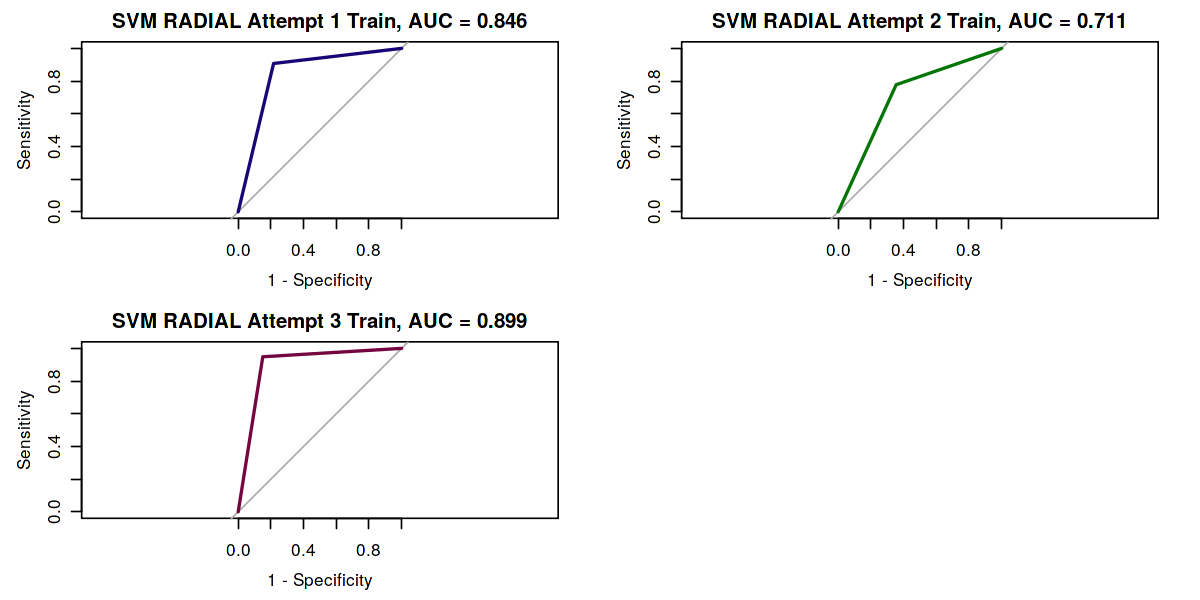

In [58]:
# Plot the ROC curve Train
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
plot(SVM_ROCTrain1, main = paste("SVM RADIAL Attempt 1 Train, AUC =",SVM_aucTrain1), col ="#190575", legacy.axes = TRUE)
plot(SVM_ROCTrain2, main = paste("SVM RADIAL Attempt 2 Train, AUC =",SVM_aucTrain2), col ="#057507", legacy.axes = TRUE)
plot(SVM_ROCTrain3, main = paste("SVM RADIAL Attempt 3 Train, AUC =",SVM_aucTrain3), col ="#75053f", legacy.axes = TRUE)

#### Summary of models

##### Confusion matrices - Train set

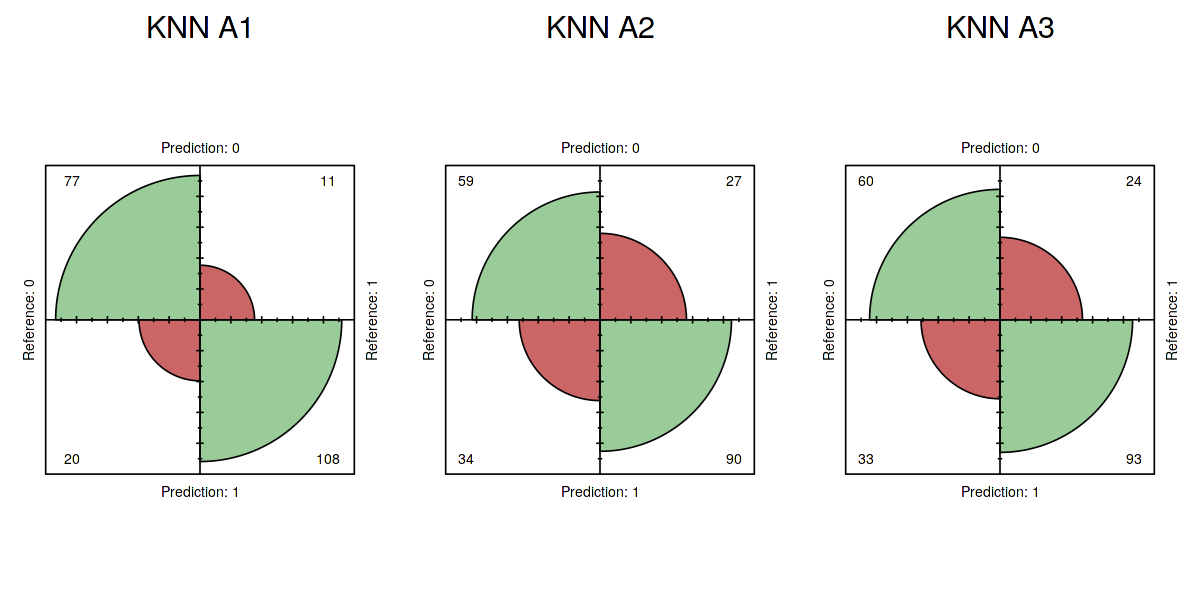

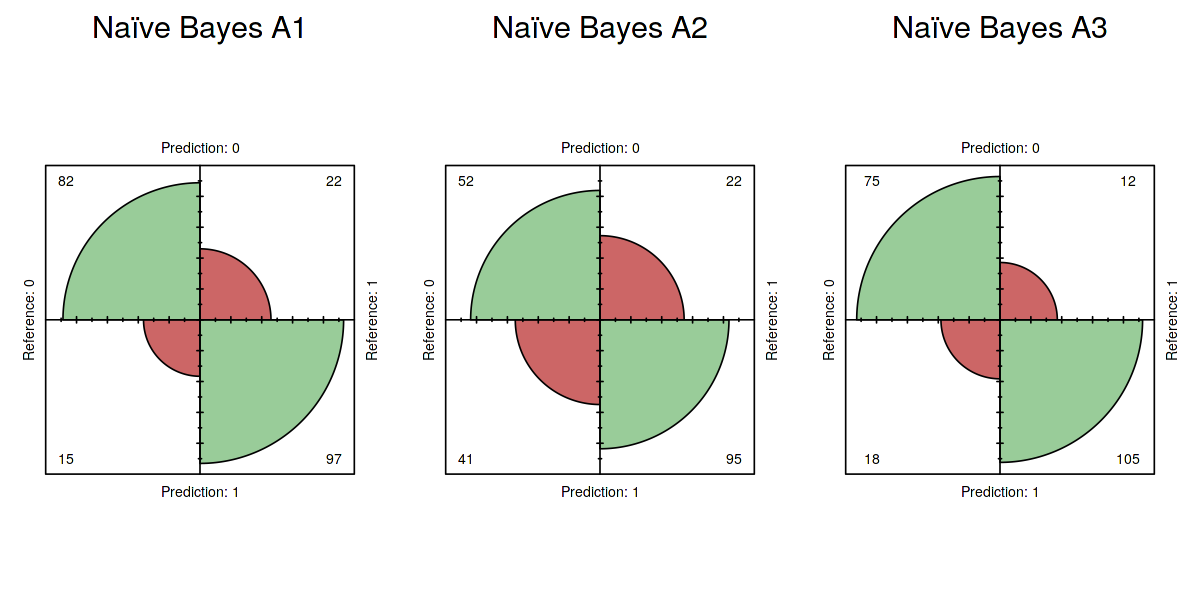

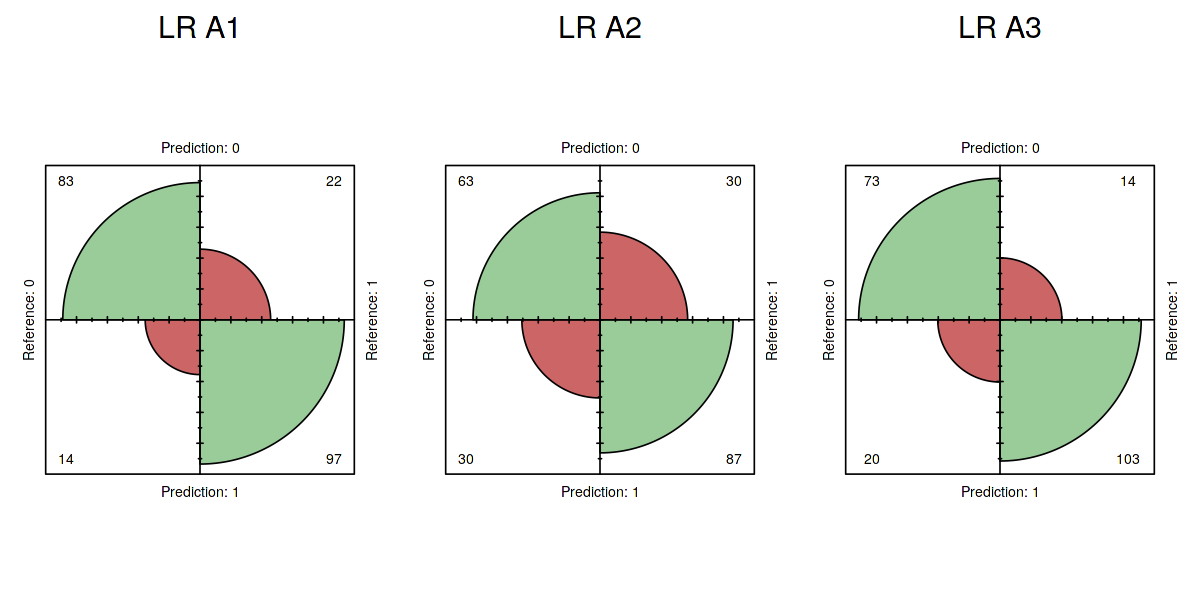

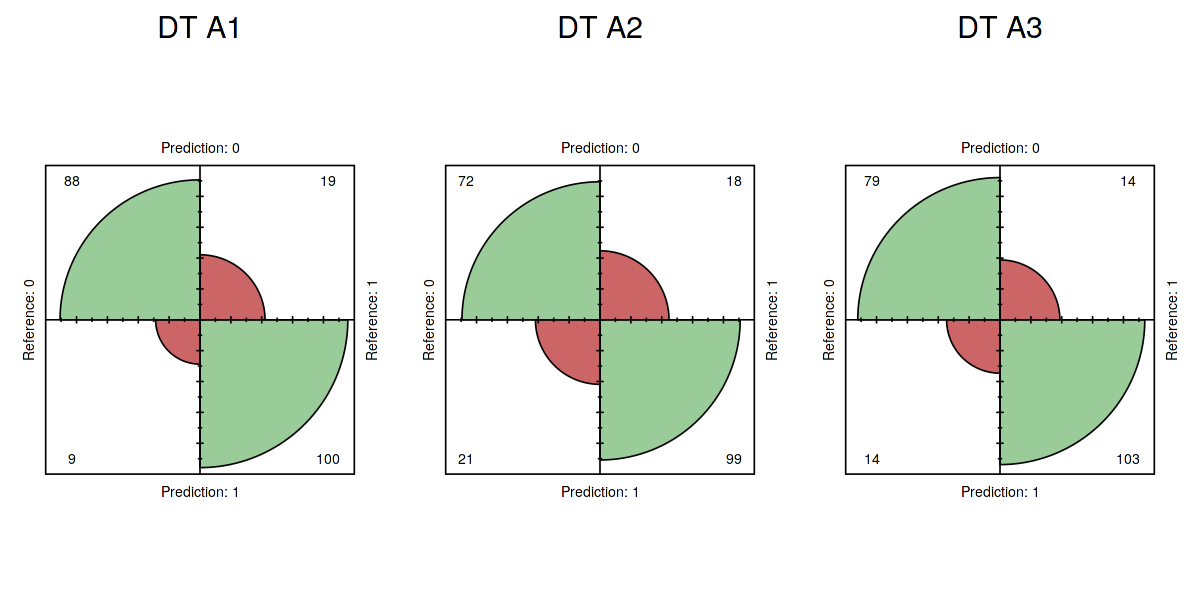

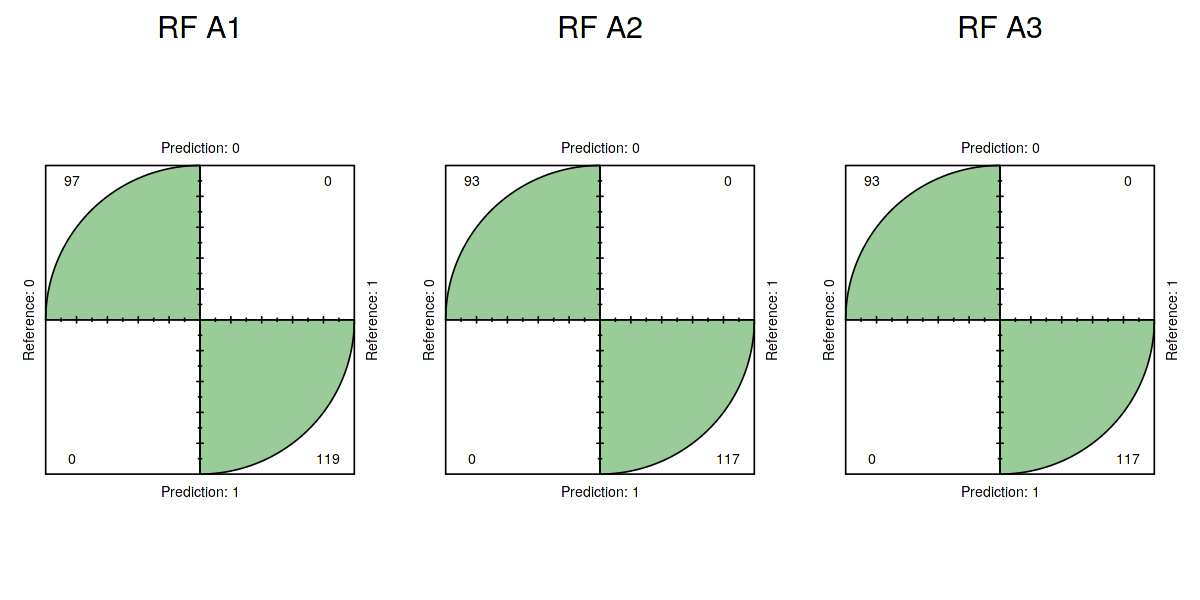

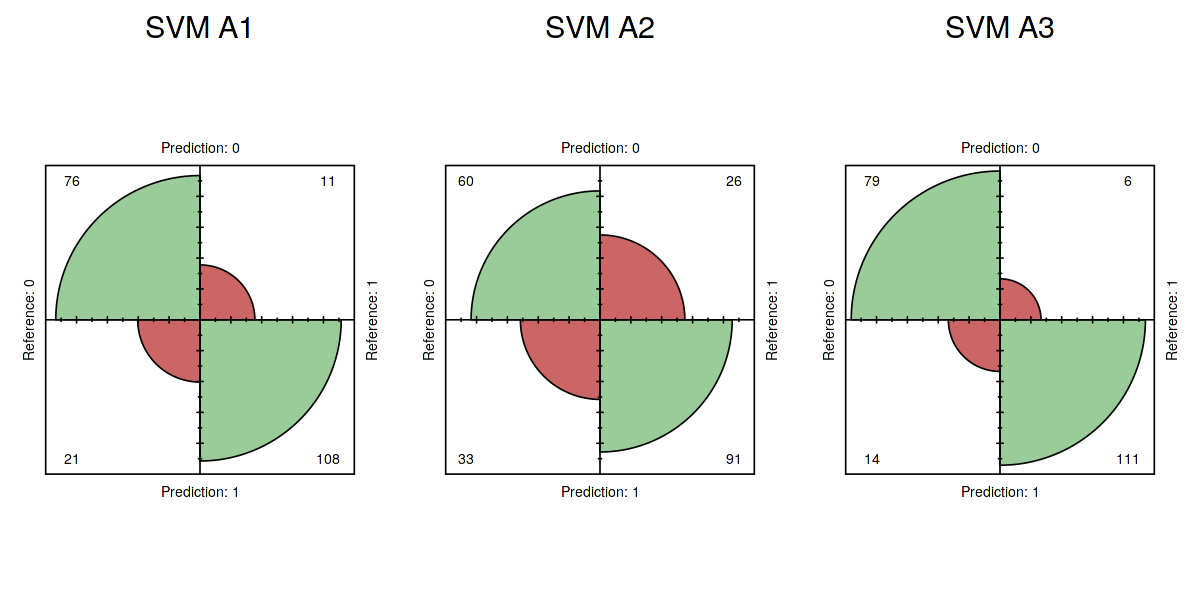

In [59]:
############### KNN ##############
par(mfrow=c(1,3))
fourfoldplot(knn_cfTrain1$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "KNN A1")
fourfoldplot(knn_cfTrain2$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "KNN A2")
fourfoldplot(knn_cfTrain3$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "KNN A3")

########### Naïve Bayes ##########
par(mfrow=c(1,3))
fourfoldplot(nb_cfTrain1$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "Naïve Bayes A1")
fourfoldplot(nb_cfTrain2$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "Naïve Bayes A2")
fourfoldplot(nb_cfTrain3$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "Naïve Bayes A3")
########### Logistic Regression ##########
par(mfrow=c(1,3))
fourfoldplot(lrcmA1Train$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "LR A1")
fourfoldplot(lrcmA2Train$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "LR A2")
fourfoldplot(lrcmA3Train$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "LR A3")

########### Decission Trees ##########
par(mfrow=c(1,3))
fourfoldplot(dtcmA1Train$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "DT A1")
fourfoldplot(dtcmA2Train$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "DT A2")
fourfoldplot(dtcmA3Train$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "DT A3")

########### Random Forest ##########
par(mfrow=c(1,3))
fourfoldplot(rtcmA1Train$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "RF A1")
fourfoldplot(rtcmA2Train$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "RF A2")
fourfoldplot(rtcmA3Train$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "RF A3")

############## SVM ###############
par(mfrow=c(1,3))
fourfoldplot(SVM_cfTrain1$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "SVM A1")
fourfoldplot(SVM_cfTrain2$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "SVM A2")
fourfoldplot(SVM_cfTrain3$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "SVM A3")


##### Performance metrics - Train set

In [60]:
############### KNN ##############
knn_model<-c("---Attempt1---",knn_accTrain1,knn_senTrain1,knn_speTrain1,knn_aucTrain1,
            "---Attempt2---",knn_accTrain2,knn_senTrain2,knn_speTrain2,knn_aucTrain2,
            "---Attempt3---",knn_accTrain3,knn_senTrain3,knn_speTrain3,knn_aucTrain3)

########### Naïve Bayes ##########
nb_model<-c("---Attempt1---",nb_accTrain1,nb_senTrain1,nb_speTrain1,nb_aucTrain1,
            "---Attempt2---",nb_accTrain2,nb_senTrain2,nb_speTrain2,nb_aucTrain2,
            "---Attempt3---",nb_accTrain3,nb_senTrain3,nb_speTrain3,nb_aucTrain3)

####### Logistic regression ######
lg_model<-c("---Attempt1---",lg_accTrain1,lg_senTrain1,lg_speTrain1,lg_aucTrain1,
            "---Attempt2---",lg_accTrain2,lg_senTrain2,lg_speTrain2,lg_aucTrain2,
            "---Attempt3---",lg_accTrain3,lg_senTrain3,lg_speTrain3,lg_aucTrain3)

######### Decision trees #########
dt_model<-c("---Attempt1---",dt_accTrain1,dt_senTrain1,dt_speTrain1,dt_aucTrain1,
            "---Attempt2---",dt_accTrain2,dt_senTrain2,dt_speTrain2,dt_aucTrain2,
            "---Attempt3---",dt_accTrain3,dt_senTrain3,dt_speTrain3,dt_aucTrain3)

########## Random forest #########
rf_model<-c("---Attempt1---",rt_accTrain1,rt_senTrain1,rt_speTrain1,rt_aucTrain1,
            "---Attempt2---",rt_accTrain2,rt_senTrain2,rt_speTrain2,rt_aucTrain2,
            "---Attempt3---",rt_accTrain3,rt_senTrain3,rt_speTrain3,rt_aucTrain3)

############## SVM ###############
svm_model<-c("---Attempt1---",SVM_accTrain1,SVM_senTrain1,SVM_speTrain1,SVM_aucTrain1,
            "---Attempt2---",SVM_accTrain2,SVM_senTrain2,SVM_speTrain2,SVM_aucTrain2,
            "---Attempt3---",SVM_accTrain3,SVM_senTrain3,SVM_speTrain3,SVM_aucTrain3)

######## CREATE DATAFRAME ########
perfComparison <- data.frame("KNN" = knn_model, "Naïve_Bayes" = nb_model,"Logistic_Reg" = lg_model,
                          "Decission_Trees" = dt_model, "Random_Forest" = rf_model, "SVM" = svm_model)
#perfComparison <- data.frame("KNN" = knn_model, "Naïve_Bayes" = nb_model, "SVM" = svm_model)

row.names (perfComparison) <- c("A1", "Accuracy A1", "Sensitivity A1", "Specificity A1", "AUC A1",
                               "A2", "Accuracy A2", "Sensitivity A2", "Specificity A2", "AUC A2",
                               "A3", "Accuracy A3", "Sensitivity A3", "Specificity A3", "AUC A3")
perfComparison

,KNN,Naïve_Bayes,Logistic_Reg,Decission_Trees,Random_Forest,SVM
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
A1,---Attempt1---,---Attempt1---,---Attempt1---,---Attempt1---,---Attempt1---,---Attempt1---
Accuracy A1,0.8,0.829,0.833,0.87,1,0.852
Sensitivity A1,0.794,0.845,0.856,0.84,1,0.784
Specificity A1,0.908,0.815,0.815,0.907,1,0.908
AUC A1,0.851,0.83,0.914,0.874,1,0.846
A2,---Attempt2---,---Attempt2---,---Attempt2---,---Attempt2---,---Attempt2---,---Attempt2---
Accuracy A2,0.71,0.7,0.714,0.814,1,0.719
Sensitivity A2,0.634,0.559,0.677,0.846,1,0.645
Specificity A2,0.769,0.812,0.744,0.774,1,0.778


From the previous table, the highest values for the permormance metrics were found in the Attempt 3 with the models _Random Forest_ and _SVM_. Therefore, these models are selected as the best ones and are used as reference for the validation with the test set. The following performance metrics are calculated in with that data set

##### ROC curves - Test set

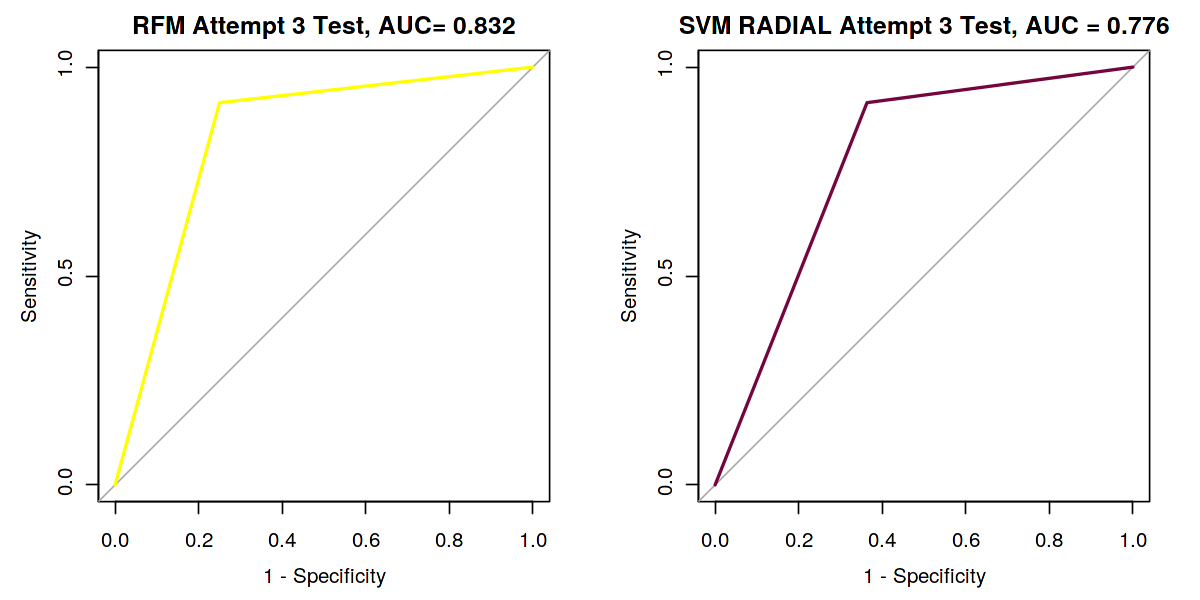

In [61]:
# Plot the ROC curve Test
par(mfrow=c(1,2))
plot(ROCA3TestRF, main=paste("RFM Attempt 3 Test, AUC=",rt_aucTest3),col = "yellow", legacy.axes = TRUE)
plot(SVM_ROCTest3, main = paste("SVM RADIAL Attempt 3 Test, AUC =",SVM_aucTest3), col ="#75053f", legacy.axes = TRUE)

##### Confusion matrices - Test set

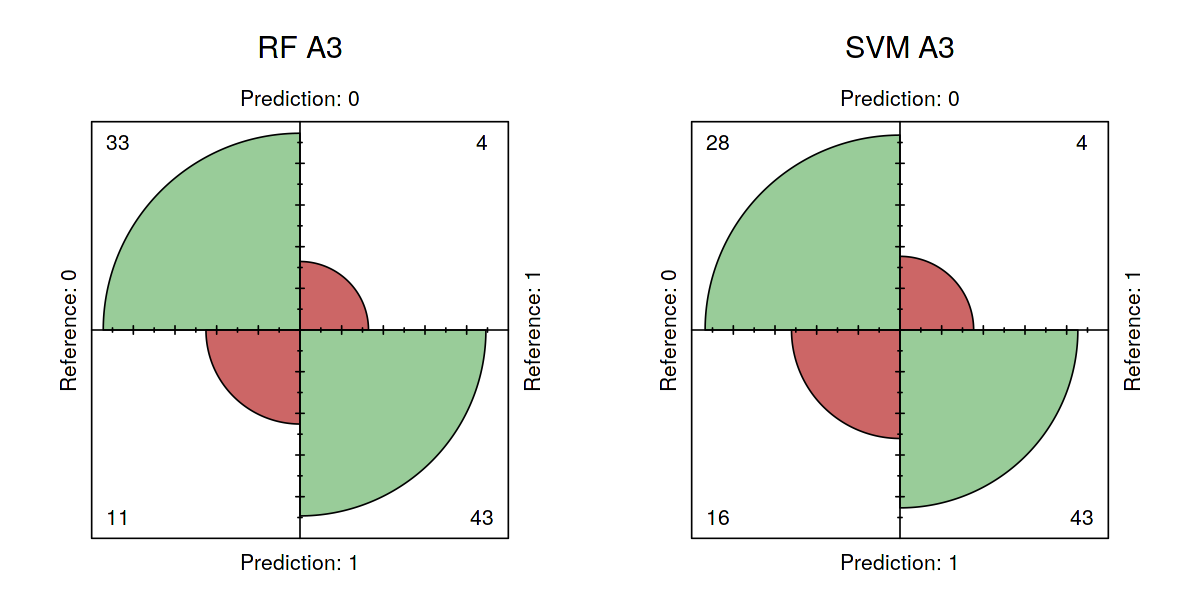

In [62]:
########### Random Forest ##########
par(mfrow=c(1,2))
fourfoldplot(rtcmA3Test$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "RF A3")

############## SVM ###############
fourfoldplot(SVM_cfTest3$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "SVM A3")


##### Performance metrics - Test set

In [63]:

########## Random forest #########
rf_model<-c("---Attempt3---",rt_accTest3,rt_senTest3,rt_speTest3,rt_aucTest3)

############## SVM ###############
svm_model<-c("---Attempt3---",SVM_accTest3,SVM_senTest3,SVM_speTest3,SVM_aucTest3)

######## CREATE DATAFRAME ########
perfComparison <- data.frame("Random_Forest" = rf_model, "SVM" = svm_model)

row.names (perfComparison) <- c("A3", "Accuracy A3", "Sensitivity A3", "Specificity A3", "AUC A3")
perfComparison

,Random_Forest,SVM
,<fct>,<fct>
A3,---Attempt3---,---Attempt3---
Accuracy A3,0.835,0.78
Sensitivity A3,0.915,0.636
Specificity A3,0.75,0.915
AUC A3,0.832,0.776


##### Cross validation for the best models and best Attempt

**Random Forest**

In [64]:
ctrl <- trainControl(method = "none")

set.seed(2)
rforestcv <- train(target ~ ., data = heartOriginal_train,
               method = "rf",
               ntree = 1000,
               trControl = ctrl,
               tuneGrid = data.frame(mtry = 3))


In [65]:
# Predicting the results with cross-validation
RF_CV1predTrain <- predict(rforestcv, newdata = heartOriginal_train) #Train
RF_CV1predTest <- predict(rforestcv, newdata = heartOriginal_test) #Test

# Making the Confusion Matrix
RF_CVcfTrain2 <-confusionMatrix(RF_CV1predTrain,heartOriginal_train$target, positive ="1")
RF_CVcfTest2 <-confusionMatrix(RF_CV1predTest,heartOriginal_test$target, positive ="1")

# Compute the accuracy
RF_CVAcc1Train <-mean(RF_CV1predTrain == heartOriginal_train$target) #Attempt3 Train
RF_CVAcc1Test <-mean(RF_CV1predTest == heartOriginal_test$target) #Attempt3 Test

In [66]:
#Comparison with the previous accuracies
print("-----TRAIN-----",quote=FALSE)
print(paste("Accuracy RF train without cross validation:",rt_accTrain3))
print(paste("Accuracy RF train with cross validation:",RF_CVAcc1Train))

print("-----TEST------",quote=FALSE)
print(paste("Accuracy RF test without cross validation:",rt_accTest3))
print(paste("Accuracy RF test with cross validation:",round(RF_CVAcc1Test,digits=3)))

[1] -----TRAIN-----


[1] "Accuracy RF train without cross validation: 1"


[1] "Accuracy RF train with cross validation: 1"


[1] -----TEST------


[1] "Accuracy RF test without cross validation: 0.835"


[1] "Accuracy RF test with cross validation: 0.846"


**SVM**

In [67]:
set.seed(42)
parameterGrid <-expand.grid(sigma = c(.01, .015, 0.2),
                    C = c(0.75, 0.9, 1, 1.1, 1.25))
SVM_CV1<- train(target ~., heartOriginal_train,
               method="svmRadial",
              trControl = trainControl(
              method ="cv", number = 10,
              , savePredictions = TRUE),
               tuneGrid = parameterGrid
              )

In [68]:
# Predicting the results with cross-validation
SVM_CV1predTrain <- predict(SVM_CV1, newdata = heartOriginal_train) #Train
SVM_CV1predTest <- predict(SVM_CV1, newdata = heartOriginal_test) #Test

# Making the Confusion Matrix
SVM_CVcfTrain2 <-confusionMatrix(SVM_CV1predTrain,heartOriginal_train$target, positive ="1")
SVM_CVcfTest2 <-confusionMatrix(SVM_CV1predTest,heartOriginal_test$target, positive ="1")

# Compute the accuracy
SVM_CVAcc1Train <-mean(SVM_CV1predTrain == heartOriginal_train$target) #Attempt1 Train
SVM_CVAcc1Test <-mean(SVM_CV1predTest == heartOriginal_test$target) #Attempt1 Test

In [69]:
#Comparison with the previous accuracies
print("-----TRAIN-----",quote=FALSE)
SVM_radialAcc1Train
SVM_CVAcc1Train

print("-----TEST------",quote=FALSE)
SVM_accTest1
SVM_CVAcc1Test

[1] -----TRAIN-----


[1] 0.8518519

[1] 0.847619

[1] -----TEST------


[1] 0.8

[1] 0.8021978

##### Miss-classification

-Possible reasons for miss-classification: outlieres, combinations of steps in the pre-processing part, data have too much noise, few observations, old measurements, class imbalance, improper classification criteria, many categorical features


In [72]:
saveRDS(rforestcv, "RF.rds")
saveRDS(SVM_CV1, "SVM.rds")